# Load Data

In [1]:
import pandas as pd
import copy

In [2]:
token = pd.read_csv('data_l/ssodam2021_tokenized.csv')
token

num board                             title  \
0      1082901   익게2                             해피뉴이어   
1      1082902   익게2                  2021년 새해복 많이받으세요   
2      1082903   익게2                            첫글은 내꼬   
3      1082905   익게2                          땡ㅎㅎㅎㅎㅎㅎㅎ   
4      1082906   익게2                 어디 카운트 다운 하는 곳 없냐   
...        ...   ...                               ...   
77975  1200285   익게2  아버지께서 칼럼 쓰셨는데 댓글 한 번씩만 달아줄 수 있을까   
77976  1200287   익게2                    프로포폴 하면 기분이 좋음   
77977  1200288   익게2                 취업 후기 쓰려는데 안올라간다ㅠ   
77978  1200291   익게2                     간떨어지는동거 보는 사람   
77979  1200293   익게2                       오타루 오마카세 후기   

                                                    text writer upload_date  \
0                                   2021년은 모두 행복한 한해가 되길     익명  2021/01/01   
1                                      모든 일이 잘 되기를 12시 땡     익명  2021/01/01   
2                                              예비회계사 나다미     익명  2021/01/01   
3                                                     1등     익명  2021/01/01   
4                                                   언제바껴     익명  2021/01/01   
...                                                  ...    ...         ...   
77975  2222408544049우리 아버지께서 이번에 짧은 칼럼처럼 블로그에 쓰시는 거 맡...     익명  2021/06/30   
77976                              하는거 신기하네하면 힙해보여서 하는건가     익명  2021/06/30   
77977  손다쳐서 폰으로 열심히 적었는데나한테왜 이래ㅠ혹시 뭔가 지켜야 하는 양식이 있나요ㅠ...     익명  2021/06/30   
77978  아 이번주 기대했는데                                예고편...     익명  2021/06/30   
77979  전에 어떤 다미가 추천한거 보고 오늘 가봤어ㅎㅎ디너 오마카세 가격은 55,000원이...     익명  2021/06/30   

      upload_time    view  likes  dislikes  \
0           00:00  1343.0  195.0       0.0   
1           00:00   107.0    3.0       0.0   
2           00:00   139.0    1.0       0.0   
3           00:00    39.0    0.0       0.0   
4           00:00    84.0    0.0       0.0   
...           ...     ...    ...       ...   
77975       23:43  5802.0  374.0      11.0   
77976       23:47   373.0    1.0       1.0   
77977       23:49   387.0    3.0       0.0   
77978       23:55   138.0    6.0       0.0   
77979       23:59   869.0   24.0       0.0   

                                                comments  \
0      앗, 성지다, 첫글 ㅊㅊ, 추천 준다, 내 24살은 인생에서 가장 빛나는 날로 만들...   
1                                                    늦었네   
2                                         ㄹㅇ 1등이네 ㅋㅋ, 실패   
3                                                    NaN   
4                                              232번 불교방송   
...                                                  ...   
77975  비댓으로 달래 너무 귀엽다, 이 글 조회수 늘리려면 제목 바꾸는거 추천 광고글인줄 ...   
77976  썰로 들은 거라 정확하지는 않는데 지방흡입할 때 고통 줄이려고 프로포폴 투약하다가 ...   
77977  중간에 임티 넣었었어, 임티, 1 이모티콘 빼기2 사진 많으면 업로드 될 동안 조금...   
77978  너무 오글거리는데 장기용때매 봄 ㅎㅎ, 난 계선우땜에 봐ㅠㅠ, 나도 계선우 때문에 ...   
77979  맛있겠다, 김을 안 주는게 아쉽다, 너무 괜찮은데 와 나도 가보고싶다지방다미, 와 ...   

                                         comments_writer  comments_cnt  \
0                                                    NaN          20.0   
1                                       2빠다 ㅎㅎ, 내년에 도전한다           3.0   
2                                                     ㅜㅜ           3.0   
3                                                    NaN           0.0   
4                                                    NaN           1.0   
...                                                  ...           ...   
77975  헉 피드백 반영했어 너무 고마워, 엇 아마 확인은 못하실 텐데 비댓이든 공개댓이든 ...          75.0   
77976                                                NaN           5.0   
77977                                              이건 되네           7.0   
77978                                                NaN           3.0   
77979  존맛 꼭가봐ㅎㅎ, 아무래도 가격이 가격인지라 전반적으로 딱 기본에 충실한 느낌이긴 ...          16.0   

                                          text_tokenized  \
0      [('2021년', 'Number'), ('은', 'Foreign'), ('모두',...   
1      [('모든', 'Noun'), ('일이', 'Modifier'), ('잘', 'Ve...   
2      [('예비', 'Noun')

## 토큰 object load

_모델 학습에 사용하는 코드로, 안돌려도 됩니다._

pickle 파일에 담겨있는 list 파일 불러오기

In [2]:
import pickle
with open('data_l/all_tokenized_list.pkl', 'rb') as f:
    all_tokenized = pickle.load(f)
    
all_tokenized[2:4]

[["('예비', 'Noun')",
  "('회계사', 'Noun')",
  "('나', 'Noun')",
  "('다미', 'Noun')",
  "('첫', 'Modifier')",
  "('글', 'Noun')",
  "('은', 'Josa')",
  "('내꼬', 'Noun')",
  "('ㄹㅇ', 'KoreanParticle')",
  "('1등', 'Number')",
  "('이네', 'Foreign')",
  "('ㅋㅋ', 'KoreanParticle')",
  "(',', 'Punctuation')",
  "('실패', 'Noun')",
  "('ㅜㅜ', 'KoreanParticle')"],
 ["('1등', 'Number')", "('땡', 'Noun')", "('ㅎㅎㅎㅎㅎㅎㅎ', 'KoreanParticle')"]]

In [94]:
def get_noun_list_from_str(msg):
    import re
    _msg = msg[1:-1]
    _msg = re.findall('\'.*?\'',_msg)
    return re.sub("'",'',_msg[0])

In [95]:
temp = []

for i in range(len(all_tokenized)):
    token_list = []
    for j in range(len(all_tokenized[i])):
        try:
            token_list.append(get_noun_list_from_str(all_tokenized[i][j]))
        except:
            pass
    temp.append(token_list)

temp[2:4]

[['예비',
  '회계사',
  '나',
  '다미',
  '첫',
  '글',
  '은',
  '내꼬',
  'ㄹㅇ',
  '1등',
  '이네',
  'ㅋㅋ',
  ',',
  '실패',
  'ㅜㅜ'],
 ['1등', '땡', 'ㅎㅎㅎㅎㅎㅎㅎ']]

In [96]:
all_tokenized = temp

Noun만 추리고 품사 제외, __키워드__만 저장

In [71]:
noun_tokenized = []

for i in range(len(all_tokenized)):
    noun_list = []
    for j in range(len(all_tokenized[i])):
        if 'Noun' in all_tokenized[i][j]:
            noun_list.append(get_noun_list_from_str(all_tokenized[i][j]))
    noun_tokenized.append(noun_list)

noun_tokenized[2:4]

[['예비', '회계사', '나', '다미', '글', '내꼬', '실패'], ['땡']]

## 1~6월 간 모든 키워드의 BoW 불러오기

In [38]:
with open('./data/idx_total.pkl','rb') as f:
    idx_total = pickle.load(f)
with open('./data/bow_total.pkl','rb') as f:
    bow_total = pickle.load(f)

## 키워드별, 일별 빈출 10위 내 등재 횟수

__해당 키워드가 1-6월의 기간동안 몇 번이나 핫 키워드(10위)에 등재되었는지__ 담은 리스트 불러오기

In [372]:
import pickle

with open("data/3rd_bow_10.pkl","rb") as fr:
    bow_10 = pickle.load(fr)
#내림차순 정렬
bow_10 = bow_10.sort_values('count', ascending = False)
bow_10.head()

keyword  count                                              dates
163      결혼     11  [19, 48, 57, 71, 114, 121, 125, 143, 146, 159,...
39       수능     11    [5, 8, 18, 24, 41, 58, 149, 154, 162, 164, 169]
70       수학     10       [8, 21, 25, 49, 89, 136, 145, 153, 162, 164]
112      연애     10    [13, 58, 98, 129, 137, 143, 153, 155, 164, 176]
302      메일      9               [38, 45, 47, 54, 55, 56, 57, 59, 68]

__해당 키워드가 1-6월의 기간동안 몇 번이나 핫 키워드(20위)에 등재되었는지__ 담은 리스트 불러오기

In [373]:
import pickle

with open("data/3rd_bow_20.pkl","rb") as fr:
    bow_20 = pickle.load(fr)
    
#내림차순 정렬
bow_20 = bow_20.sort_values('count', ascending = False)
bow_20.head()

keyword  count                                              dates
307      결혼     16  [19, 31, 48, 57, 71, 88, 92, 114, 121, 125, 13...
41       휴학     14  [3, 21, 25, 27, 37, 38, 55, 58, 60, 103, 109, ...
12       메일     14  [1, 38, 45, 46, 47, 54, 55, 56, 57, 59, 60, 61...
28       검사     13  [2, 10, 44, 83, 84, 85, 86, 87, 104, 109, 127,...
78       수능     13  [5, 8, 16, 18, 24, 41, 58, 117, 149, 154, 162,...

# 떡밥 묶음 찾기

## bow 생성

__bow_10과 bow_20의 인덱스 비교__

비교 결과 bow_20가 bow_10를 포함한다

In [374]:
a = list(bow_10['keyword'])
a[:5]

['결혼', '수능', '수학', '연애', '메일']

In [375]:
b = list(bow_20['keyword'])
b[:5]

['결혼', '휴학', '메일', '검사', '수능']

In [376]:
for i in range(len(a)):
    if a[i] not in b:
        print('bow_10의 keyword는 bow_20의 keyword에 다 포함되지 않는다.')
        break
print('끝') ## bow_10의 keyword는 bow_20의 keyword에 다 포함된다.

끝


__bow__
pd.merge를 활용한 JOIN 실행 -> bow_10과 bow_20의 count합 도출

In [377]:
bow = bow_20.copy()
bow['count'] = bow['count']*0.5

bow = bow.merge(bow_10, left_on='keyword', right_on='keyword',
          suffixes=('', '_10'))
bow['count'] = bow['count'] + bow['count_10']
bow.drop('count_10',axis=1,inplace=True)
bow = bow.sort_values('count',ascending=False)

In [378]:
bow_keyword = list(bow['keyword'])
bow_keyword

['결혼',
 '수능',
 '수학',
 '연애',
 '메일',
 '주식',
 '병원',
 '휴학',
 '수강신청',
 '새내기',
 '수강',
 '계절',
 '중국',
 '검사',
 '게임',
 '문과',
 '공대',
 '조교',
 '서울대',
 '학부',
 '복전',
 '경영',
 '확',
 '재수강',
 '사건',
 '폰',
 '대면',
 '프로',
 '외모',
 '성격',
 '로욜라',
 '진자',
 '족보',
 '허가',
 '총장',
 '싸인',
 '카페',
 '학과',
 '마스크',
 '비대',
 '술',
 '미국',
 '동아리',
 '공지',
 '컴공',
 '투표',
 '합격',
 '상담',
 '동생',
 '치킨',
 '몸',
 '지방',
 '아이패드',
 '이과',
 '행정',
 '신고',
 '필기',
 '스카',
 '비율',
 '과외',
 '인턴',
 '아파트',
 '예수회',
 '로스쿨',
 '티',
 '부동산',
 '세대',
 '팬',
 '자리',
 '키',
 '백신',
 '계량',
 '오픈',
 '경제',
 '학번',
 '시위',
 '방송',
 '선물',
 '용돈',
 '평균',
 '학원',
 '직장',
 '기업',
 '노력',
 '표현',
 '나라',
 '면접',
 '아빠',
 '앱',
 '경제학',
 '대출',
 '후배',
 '자랑',
 '서울',
 '일본',
 '대학원',
 '문화',
 '론',
 '버스',
 '선배',
 '삼성',
 '대기업',
 '펜',
 '아이폰',
 '화',
 '영상',
 '애플',
 '한강',
 '시장',
 '범위',
 '입결',
 '인터넷',
 '토익',
 '정치',
 '옷',
 '학생회',
 '행동',
 '버거',
 '알바',
 '정시',
 '카톡',
 '투자',
 '공감',
 '가정',
 '경찰',
 '세금',
 '신청',
 '수사',
 '금시',
 '형',
 '스트레스',
 '선택',
 '사용',
 '장학금',
 '물리',
 '회',
 '수술',
 '교양',
 '실험',
 '학벌',
 '실시간',
 '변

In [11]:
bow_keyword_noun = []
for i in range(len(bow_keyword)):
    bow_keyword_noun.append("('" + bow_keyword[i] +"', 'Noun')")
    
bow_keyword_noun

["('변호사', 'Noun')",
 "('문과', 'Noun')",
 "('외모', 'Noun')",
 "('연애', 'Noun')",
 "('아빠', 'Noun')",
 "('동생', 'Noun')",
 "('일본', 'Noun')",
 "('휴학', 'Noun')",
 "('의사', 'Noun')",
 "('중국', 'Noun')",
 "('고양이', 'Noun')",
 "('논문', 'Noun')",
 "('세대', 'Noun')",
 "('동아리', 'Noun')",
 "('학부', 'Noun')",
 "('결혼', 'Noun')",
 "('조교', 'Noun')",
 "('대면', 'Noun')",
 "('수능', 'Noun')",
 "('대출', 'Noun')",
 "('헌혈', 'Noun')",
 "('언니', 'Noun')",
 "('수술', 'Noun')",
 "('의대', 'Noun')",
 "('이과', 'Noun')",
 "('경제학', 'Noun')",
 "('애플', 'Noun')",
 "('총장', 'Noun')",
 "('냉동', 'Noun')",
 "('투표', 'Noun')",
 "('경찰', 'Noun')",
 "('오빠', 'Noun')",
 "('할머니', 'Noun')",
 "('과외', 'Noun')",
 "('공대', 'Noun')",
 "('생일', 'Noun')",
 "('족보', 'Noun')",
 "('리트', 'Noun')",
 "('삼성', 'Noun')",
 "('검사', 'Noun')",
 "('팬', 'Noun')",
 "('자랑', 'Noun')",
 "('서울대', 'Noun')",
 "('로욜라', 'Noun')",
 "('미국', 'Noun')",
 "('백신', 'Noun')",
 "('합격', 'Noun')",
 "('교회', 'Noun')",
 "('곡', 'Noun')",
 "('부동산', 'Noun')",
 "('정치', 'Noun')",
 "('폰', 'Noun')",
 "('방송'

## Word2Vec

__모델 학습__

In [97]:
'''
from gensim.models import Word2Vec
model_a = Word2Vec(sentences = all_tokenized, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).

with open('./data/w2v_model.pkl','wb') as f:
    pickle.dump(model_a,f)
'''

__학습 저장된 모델 불러오기__

In [98]:
with open('./data/w2v_model.pkl','rb') as f:
    model_a = pickle.load(f)

__학습 결과 확인__

In [101]:
word_vectors = model_a.wv
vocabs = bow_keyword[:100]
word_vectors_list = [word_vectors[v] for v in vocabs]
len(word_vectors_list)

100

In [102]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(14 ,14))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))


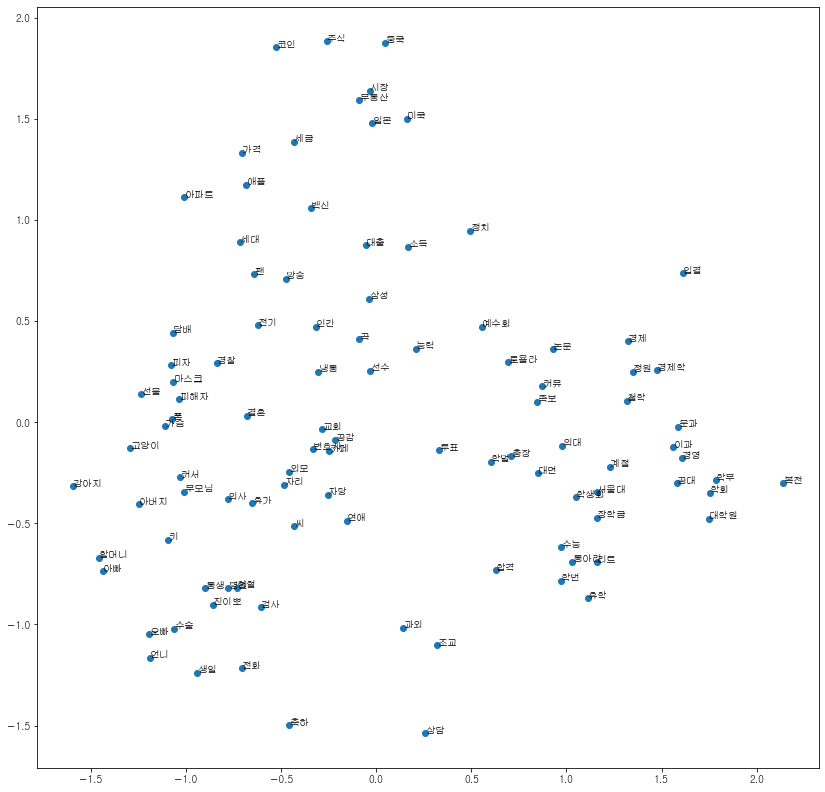

In [103]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#2차원으로 축소
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

plt.rcParams['font.family'] = 'Gulim'
 
# 결과2
plot_2d_graph(vocabs, xs, ys)
plt.show()
## 처음부터 100개

---

# 새 시도

In [176]:
similarity_75_list_b = []

for i in range(len(bow_keyword)):
    df = pd.DataFrame(columns = ['word', 'sim'])
    
    for j in range(i,len(bow_keyword)):
        sim = model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')")
        if sim >= 0.5:
            df = df.append(pd.DataFrame([[bow_keyword[j], sim]], columns=['word', 'sim']), ignore_index=True)
            
    df = df.sort_values(by=['sim'], axis=0, ascending=False)
            
    if len(df) == 1:
        pass
    else:
        similarity_75_list_b.append(list(df['word'])) ## 정렬

In [177]:
list_idx = []

for i in range(len(similarity_75_list_b)):
    
    list_idx_in = []
    for j in range(len(similarity_75_list_b[i])):
        list_idx_in.append(None)
    
    for j in range(1, len(similarity_75_list_b[i])):
        for k in range(i+1, len(similarity_75_list_b)):
            if similarity_75_list_b[i][j] == similarity_75_list_b[k][0]:
                list_idx_in[j] = k
    
    
    list_idx.append(list_idx_in) ## 위치 저장

In [178]:
similarity_75_list_b1 = copy.deepcopy(similarity_75_list_b)

df_sim_75 = pd.DataFrame({'word': similarity_75_list_b1,
                    'index': list_idx})



for i in range(len(df_sim_75)):
    for j in range(1,len(df_sim_75['index'].loc[i])):
        new_idx = df_sim_75['index'].loc[i][j]
        L = []
        if new_idx == None:
            L.append(df_sim_75['word'].loc[i][j])
            df_sim_75['word'].loc[i][j] = L
        else:
            df_sim_75['word'].loc[i][j] = copy.deepcopy(df_sim_75['word'].loc[new_idx])
            ## 1단계 가지까지 포함시키기

In [179]:
for h in range(len(df_sim_75)):
    for i in range(0,len(df_sim_75['word'].loc[h])):
        if df_sim_75['index'].loc[h][i] == None:
            pass
        else:
            for j in range(1, len(df_sim_75['word'].loc[h][i])):
                if df_sim_75['word'].loc[h][i][j] == 'bye':
                    pass
                else:
                    for k in range(i+1, len(df_sim_75['word'].loc[h])):
                        for l in range(len(df_sim_75['word'].loc[h][k])):
                            if df_sim_75['word'].loc[h][k][l] == 'bye':
                                pass
                            else:
                                sim = model_a.wv.similarity(w1="('" + df_sim_75['word'].loc[h][i][j] +"', 'Noun')",
                                                            w2="('" + df_sim_75['word'].loc[h][k][l] +"', 'Noun')")

                                   
                                if sim <= 0.3:
                                    df_sim_75['word'].loc[h][k][l] = 'bye' ## 1단계 가지 치기
                                    
                                    

In [180]:
for h in range(len(df_sim_75)):

    list_test = []

    for i in range(len(df_sim_75['word'].loc[h])):
        if i != 0:
            if type(df_sim_75['word'].loc[h][i]) is not list:
                list_test.append(df_sim_75['word'].loc[h][i])
            else:    
                list_test = list_test + [word for word in df_sim_75['word'].loc[h][i] if word != 'bye']
    
            list_test = list(set(list_test))
    
    
    list_test.insert(0, df_sim_75['word'].loc[h][0])
        
    list_test

    df_sim_75['word'].loc[h] = list_test

df_sim_75

word  \
0     [변호사, 회사, 유예, 판사, 임원, 한국사, 특기, 장교, 대기업, 회계사, 대...   
1     [문과, 등급, 중대, 한양, 부산, 대학원, 연대, 중앙대, 입결, 약대, 오르비...   
2     [외모, 열등감, 쌍둥이, 비혼, 고증, 집안, 직업, 불륜, 뽀로로, 몸매, 흑인...   
3     [연애, 고백, 비혼, 자식, 집안, 직업, 불륜, 합의, 여행, 집들이, 제사, ...   
4     [아빠, 동생, 길냥이, 쌍둥이, 이모, 상화, 자식, 집안, 강아지, 댁, 불륜,...   
...                                                 ...   
1115                                           [타협, 남탓]   
1116                                  [대중, 떡밥, 독일, 유희왕]   
1117                                          [떡밥, 유희왕]   
1118                                 [포르투갈, 독일, 유희왕, 승]   
1119                                          [독일, 유희왕]   

                                                  index  
0     [None, 241, 238, 870, 630, 249, 1108, 982, 553...  
1     [None, 24, 34, 872, 42, None, 856, 999, 604, 3...  
2     [None, 1091, 56, 184, 237, 3, 484, 1092, 286, ...  
3     [None, 15, 810, 913, 1099, 684, 366, 525, 1093...  
4     [None, 380, 32, 99, 223, 21, 101, 576, 31, 259...  
...                                                 ...  
1115                                       [None, None]  
1116                           [None, None, 1117, 1119]  
1117                                       [None, None]  
1118                           [None, 1119, None, None]  
1119                                       [None, None]  

[1120 rows x 2 columns]

# 이전 시도

## 떡밥 묶음 찾기

### 다수 키워드의 느슨한 묶음 방법 (버림)

#### index 수정

In [220]:
bow = bow_10.reset_index()
bow.head()

index keyword  count
0    114      연애      8
1    420      외모      8
2     17     변호사      8
3     69      문과      8
4    577      아빠      7

### 상관계수 높은 키워드 파악

In [375]:
import pickle

with open('./data/idx_total.pkl','rb') as f:
    idx_total = pickle.load(f)
with open('./data_l/cfd.pkl','rb') as f:
    cfd = pickle.load(f)
with open('./data/2nd_10bow.pkl','rb') as f:
    bow10_ex = pickle.load(f)
with open('./data/3rd_bow_10.pkl','rb') as f:
    bow10 = pickle.load(f)
with open('./data/3rd_bow_20.pkl','rb') as f:
    bow20 = pickle.load(f)

In [348]:
idx_key = dict([(value, key) for key, value in idx_total.items()])

In [349]:
import numpy as np

#BoW 매트릭스
BoW_mat = np.array([list(value) for value in cfd.BoW.values])

#Points 매트릭스
Points = np.array([list(value) for value in cfd.points.values])

In [377]:
bow10_ex.sort_values('count',ascending=False).keyword[:30]

114     연애
420     외모
17     변호사
69      문과
577     아빠
33      일본
223     의사
65      의대
294     대출
64      중국
78      휴학
256    동아리
11      동생
50      세대
113     헌혈
6       냉동
257    고양이
218     논문
32      정치
149     생일
795     조교
45      과외
184     이과
265     교회
42      대면
62      애플
609     투표
326    경제학
168     언니
290     삼성
Name: keyword, dtype: object

In [382]:
bow10.sort_values('count',ascending=False).iloc[:30]

keyword  count                                              dates
163      결혼     11  [19, 48, 57, 71, 114, 121, 125, 143, 146, 159,...
39       수능     11    [5, 8, 18, 24, 41, 58, 149, 154, 162, 164, 169]
70       수학     10       [8, 21, 25, 49, 89, 136, 145, 153, 162, 164]
112      연애     10    [13, 58, 98, 129, 137, 143, 153, 155, 164, 176]
302      메일      9               [38, 45, 47, 54, 55, 56, 57, 59, 68]
59       주식      9                [7, 8, 19, 28, 31, 42, 44, 91, 102]
11      새내기      8                 [2, 61, 69, 77, 81, 106, 171, 178]
298      수강      8                   [37, 38, 47, 54, 55, 56, 59, 60]
301    수강신청      8                   [38, 44, 45, 46, 48, 54, 56, 60]
273      병원      8             [34, 49, 125, 129, 142, 157, 164, 179]
268      조교      7                 [33, 109, 115, 127, 131, 154, 169]
177      휴학      7                     [21, 25, 37, 55, 58, 109, 150]
32      재수강      7                  [4, 102, 158, 166, 167, 172, 178]
775      게임      7                [126, 133, 136, 137, 138, 139, 151]
68       공대      7                     [8, 55, 74, 89, 105, 122, 165]
557       확      7                    [83, 85, 87, 88, 151, 173, 179]
233      학부      7                   [29, 95, 98, 105, 116, 135, 178]
42       계절      7                   [5, 24, 111, 145, 152, 155, 172]
180      문과      7                   [21, 40, 89, 147, 154, 162, 170]
47       외모      6                         [5, 51, 69, 143, 161, 171]
38       사건      6                        [4, 71, 122, 123, 136, 149]
491      성격      6                       [72, 86, 141, 149, 153, 157]
417      공지      6                         [59, 63, 87, 88, 130, 132]
76       프로      6                        [9, 14, 105, 110, 155, 163]
87      로욜라      6                        [10, 32, 82, 102, 116, 139]
138      경영      6                        [16, 39, 47, 112, 135, 168]
103      합격      6                           [12, 18, 19, 49, 63, 98]
356      허가      6                           [47, 54, 55, 56, 60, 61]
351      싸인      6                           [46, 47, 54, 55, 56, 61]
131      카페      6                       [15, 58, 121, 156, 170, 176]

In [386]:
_bow10 = bow10.sort_values('count',ascending=False)
_bow10.head()

keyword  count                                              dates
163      결혼     11  [19, 48, 57, 71, 114, 121, 125, 143, 146, 159,...
39       수능     11    [5, 8, 18, 24, 41, 58, 149, 154, 162, 164, 169]
70       수학     10       [8, 21, 25, 49, 89, 136, 145, 153, 162, 164]
112      연애     10    [13, 58, 98, 129, 137, 143, 153, 155, 164, 176]
302      메일      9               [38, 45, 47, 54, 55, 56, 57, 59, 68]

In [392]:
BoW_mat.T[idx_total['결혼']]

array([ 5.,  8.,  8.,  4.,  4.,  7.,  7.,  2.,  6.,  9., 13.,  0.,  4.,
        7.,  4., 13.,  6.,  8.,  7., 20., 10., 13.,  7.,  9.,  3.,  4.,
       17.,  8.,  7., 12.,  5., 18., 20.,  3., 10., 14., 16.,  6.,  8.,
        5.,  1.,  8., 17., 19., 16., 10.,  5.,  8., 25.,  6.,  0.,  5.,
        3.,  1., 16., 13.,  1., 18.,  6.,  2.,  9.,  3.,  3.,  8.,  5.,
        9.,  8., 13., 11.,  3., 13., 24.,  4.,  3., 11.,  8., 11.,  5.,
        4., 13., 13.,  5.,  4.,  9.,  4.,  6., 16.,  1., 17.,  5.,  1.,
        1., 17., 12.,  5.,  7.,  4., 20., 11.,  5.,  1.,  4., 11.,  4.,
        9.,  8.,  2.,  6.,  8.,  1.,  5.,  4.,  6.,  8., 23.,  3., 16.,
        5.,  6.,  2., 12., 30.,  9.,  6.,  3., 24.,  0.,  9.,  4.,  1.,
        3., 14., 12.,  7.,  4., 16.,  5., 20., 13.,  3., 11.,  3., 19.,
       54.,  5.,  6., 22.,  4.,  2.,  3.,  7.,  7., 16.,  6.,  7., 16.,
       14., 16., 15., 27., 39., 11., 10., 13., 18.,  4.,  7.,  3.,  4.,
        8., 11.,  4.,  8.,  2.,  3., 18., 11., 12.,  2.,  2.,  6

In [397]:
BoW_mat.T[0]

array([11.,  0.,  2.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  4.,
        1.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,
        1.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,  0.,  0.,  0.,
        1.,  2.,  0.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        2.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  3.,  1.,  0.,  0.,
        1.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  2.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        2.,  1.,  0.,  1.,  1.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,  1.,  1

In [400]:
BoW_mat.T[0]

array([11.,  0.,  2.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  4.,
        1.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,
        1.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,  0.,  0.,  0.,
        1.,  2.,  0.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        2.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  3.,  1.,  0.,  0.,
        1.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  2.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        2.,  1.,  0.,  1.,  1.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,  1.,  1

In [410]:
corr_keywords = [[] for _ in range(20)]

for idx in range(20):
    hot_dates = []
    for date in _bow10.iloc[idx].dates:
        hot_dates.append(date-1)
        hot_dates.append(date)
    _BoW_mat = BoW_mat.T[idx_total[_bow10.iloc[idx].keyword]]
    main_word_seq = np.zeros(len(hot_dates))
    # 중심 키워드의 급상승 전후
    for i, day in enumerate(hot_dates):
        main_word_seq[i] = _BoW_mat[day]
    for j, counts in enumerate(BoW_mat.T):
        # 비교 키워드의 급상승 전후
        sub_word_seq = np.zeros(len(hot_dates))
        for i, day in enumerate(hot_dates):
            sub_word_seq[i] = counts[day]
        # 둘 사이 상관계수 도출
        if np.corrcoef(main_word_seq,sub_word_seq)[1,0]>0.6:
            corr_keywords[idx].append(j)
    break

In [247]:
def idxs_to_keywords(wlist):
    from copy import deepcopy
    output = deepcopy(wlist)
    for indices in output:
        for i in range(len(indices)):
            indices[i] = idx_key[indices[i]]
    return output

In [411]:
len(corr_keywords[0])

958

In [412]:
idxs_to_keywords(corr_keywords)[0]

['가장',
 '사람',
 '보고',
 '사진첩',
 '챔스',
 '뭔가',
 '얘기',
 '엄마',
 '눈',
 '솔',
 '얼굴',
 '주변',
 '부부',
 '굳이',
 '모해',
 '본인',
 '이어폰',
 '헤드셋',
 '노캔',
 '시장',
 '확언',
 '오오오오',
 '적립금',
 '고려',
 '상대',
 '통계',
 '텅텅',
 '망치',
 '유물',
 '주위',
 '전날',
 '값',
 '박보검',
 '결혼',
 '매틀랩',
 '남사',
 '끼',
 '개심',
 '요하',
 '대형',
 '백분',
 '주치의',
 '표준편차',
 '지노',
 '자발',
 '외모',
 '소개팅',
 '기풍',
 '염',
 '끈',
 '슴넷',
 '책사',
 '이주일',
 '타협',
 '산다',
 '방위',
 '갠톡',
 '캐치',
 '물리학자',
 '쿨',
 '원인',
 '여의사',
 '부방',
 '여성',
 '줫으',
 '적군',
 '노역',
 '남성만',
 '내적',
 '글거',
 '이상형',
 '재입대',
 '시골',
 '도덕',
 '나머진',
 '구가',
 '소굴',
 '심정은',
 '판사',
 '구상권',
 '가치관',
 '객관',
 '냥',
 '이기주의',
 '테이크',
 '전조',
 '중애',
 '시내',
 '공사',
 '억',
 '산수',
 '글삭',
 '말머리',
 '가정사',
 '잘잘못',
 '결석',
 '딕션',
 '모공',
 '유전학',
 '생태계',
 '일률',
 '경향',
 '사피',
 '이하임',
 '동차',
 '틴더',
 '토트넘',
 '흥민',
 '픽',
 '일락',
 '호감',
 '비교우위',
 '노후',
 '팼다',
 '나선',
 '신잡',
 '획일',
 '주주',
 '강동원',
 '졸업장',
 '징수',
 '이연',
 '상임',
 '평타',
 '블투',
 '인민',
 '난감',
 '헤드폰',
 '키도',
 '뜻밖',
 '유미',
 '전도',
 '헐랭',
 '모시',
 '피라미드',
 '잌',
 '동성',
 '제거',
 '노블레

#### 상위 N개 키워드와 타 키워드 간의 상관관계 산출

__정규화__

In [362]:
word_counts = BoW_mat.T.copy()
#for i in range(len(word_counts)):
#   word_counts[i] = (word_counts[i]-word_counts[i].mean()) / word_counts[i].std() if word_counts[i].std()!=0 else word_counts[i]

In [363]:
word_counts

array([[11.,  0.,  2., ...,  1.,  1.,  0.],
       [ 1.,  0.,  3., ...,  3.,  3.,  0.],
       [29., 41., 42., ..., 53., 54.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [333]:
from tqdm.notebook import tqdm

topic_lists = [[] for i in range(20)]
check = []
for idx, word in tqdm(enumerate(bow.keyword[:20])):
    topic_lists[idx].append(idx_total[word])
    for j in tqdm(range(len(word_counts))):
        if i==j : continue
        corr = np.corrcoef(word_counts[i], word_counts[j])
        if corr[0,1]>0.5:
            topic_lists[idx].append(j)
            check.append(corr[1,0])
    break

0it [00:00, ?it/s]

  0%|          | 0/79288 [00:00<?, ?it/s]

#### 인덱스 -> 키워드

In [334]:
idxs_to_keywords(topic_lists)

[['연애',
  '예수',
  '일복',
  '종교',
  '목사',
  '교회',
  '천만',
  '사기',
  '족보',
  '안떳',
  '명분',
  '햇님',
  '쁠제',
  '교인',
  '카드',
  '취준생입장',
  '덱',
  '송가',
  '턴',
  '자비',
  '출혈',
  '여의사',
  '소환',
  '함정',
  '존중',
  '지자체',
  '영양사',
  '저편',
  '포켓몬',
  '상속',
  '진주',
  '쑈',
  '순서대로',
  '김대원',
  '배탈',
  '사시미',
  '입원',
  '추산',
  '사무관',
  '올렷음',
  '신화',
  '파티션',
  '타카',
  '응로',
  '배타',
  '혼돈',
  '투약',
  '유언',
  '하버',
  '승산',
  '헤드락',
  '한형',
  '특허청',
  '마녀',
  '신약',
  '무빙워크',
  '더치트',
  '천명',
  '사망률',
  '파레',
  '팔만',
  '김씨',
  '우크라이나',
  '악행',
  '수급',
  '킹반',
  '터키',
  '서식지',
  '지느러미',
  '불면증',
  '브레이커',
  '브아걸',
  '아이콘',
  '제아',
  '화상회의',
  '마도',
  '괘씸',
  '과세',
  '준공',
  '욕망',
  '이씨',
  '레후',
  '까무러칠듯',
  '생활자',
  '쭉빵',
  '승호',
  '외교부',
  '이재영',
  '디아',
  '기독교',
  '제물',
  '이호선',
  '금영',
  '프로포폴',
  '재심사',
  '유능',
  '조혜연',
  '컨츠',
  '프리킥',
  '권창훈',
  '와일드카드',
  '업도',
  '경위서',
  '회뜰때',
  '대학로',
  '삐삐',
  '샘물',
  '듀얼',
  '쿤',
  '개편안',
  '사용설명서',
  '초본',
  '현명',
  '산초',
  '가젯',
  '오도독',
  '수병',
  '상습범',
 

# 안 버려

similarity가 0.5가 넘는 키워드의 경우 삭제

-> 떡밥의 가짓수를 늘리고 독립성 보장

In [221]:
bow_rev = bow.copy()

In [225]:
bow[:20]

index keyword  count
0     114      연애      8
1     420      외모      8
2      17     변호사      8
3      69      문과      8
4     577      아빠      7
5      33      일본      7
6     223      의사      7
7      65      의대      6
8     294      대출      6
9      64      중국      6
10     78      휴학      6
11    256     동아리      6
12     11      동생      6
13     50      세대      6
14    113      헌혈      6
15      6      냉동      6
16    257     고양이      6
17    218      논문      6
18     32      정치      5
19    149      생일      5

In [224]:
from tqdm.notebook import tqdm

bow_rev = bow.copy()
idx_del = set()

for i in tqdm(range(len(bow))):
    # 20개 모였으면 pass
    if len(idx_del) >=30 :
        continue
    #삭제된 행이면 pass
    if i in idx_del:
        continue
    word = bow.loc[i,'keyword']
    for j in range(i+1,len(bow)):
        #삭제된 행이면 pass
        if j in idx_del:
            continue
        # 단어간 유사도가 크면,
        if model_a.wv.similarity(word, bow.loc[j, 'keyword']) > 0.4:
            # 삭제할 index에 추가
            idx_del.add(j)

#삭제가 필요한 index에 맞춰 행 삭제
for idx in idx_del:
    bow_rev = bow_rev.drop(idx)

display(bow_rev[:20])

  0%|          | 0/1184 [00:00<?, ?it/s]

index keyword  count
0     114      연애      8
2      17     변호사      8
3      69      문과      8
4     577      아빠      7
5      33      일본      7
8     294      대출      6
9      64      중국      6
10     78      휴학      6
11    256     동아리      6
12     11      동생      6
13     50      세대      6
14    113      헌혈      6
15      6      냉동      6
16    257     고양이      6
17    218      논문      6
18     32      정치      5
19    149      생일      5
20    795      조교      5
21     45      과외      5
23    265      교회      5

#### 키워드 1차 확장

In [217]:
count = 0
for i in range(len(bow_rev)):
    if model_a.wv.similarity(bow_rev.iloc[0].keyword, bow_rev.iloc[i].keyword) > 0.3:
        count+=1
count

499

In [219]:
bow_rev[:30]

index keyword  count
0      35     변호사     14
2     137      문과     12
3      40      휴학     12
6      24      동생     12
7     220      연애     11
8      63      미국     11
9     518       팬     10
10    125      중국     10
12     69      일본     10
13    703      총장     10
14    976       곡      9
16     80      수능      9
17    509      조교      9
18     47      대면      9
19    107      철학      9
21    468     고양이      9
22    135      복전      9
24     97      세대      8
25    122      애플      8
26    462     동아리      8
28    133      공대      8
29    142      이과      8
30    147      담배      8
31    774      공감      8
32    402     경제학      8
33    333      논문      8
34    405      수술      8
35    118      주식      8
36     88      카페      8
37    296      축하      8

---

#### 다린 방법

In [43]:
similarity_75_list = []

for i in range(len(bow_keyword)):
    sim_keyword_list = [bow_keyword[i]]
    
    for j in range(i+1,len(bow_keyword)):
        if model_n.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')") >= 0.75:
            sim_keyword_list.append(bow_keyword[j])
            
    if len(sim_keyword_list) == 1:
        pass
    else:
        similarity_75_list.append(sim_keyword_list)
    
similarity_75_list
# Noun으로 모델 

NameError: name 'model_n' is not defined

In [44]:
similarity_75_list_a = []

for i in range(len(bow_keyword)):
    sim_keyword_list = [bow_keyword[i]]
    
    for j in range(i+1,len(bow_keyword)):
        if model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')") >= 0.75:
            sim_keyword_list.append(bow_keyword[j])
            
    if len(sim_keyword_list) == 1:
        pass
    else:
        similarity_75_list_a.append(sim_keyword_list)
    
similarity_75_list_a
# all_tokenized으로 모델

[['변호사', '회계사', '약사'],
 ['문과', '이과', '공대', '서울대', '정시', '약대'],
 ['외모', '몸매'],
 ['아빠', '언니', '할머니', '아버지', '누나', '어머니', '할아버지', '이모'],
 ['일본', '중국', '미국', '한국', '우리나라'],
 ['휴학', '복학'],
 ['중국', '미국', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['학부', '대학원', '인문'],
 ['동아리', '학회', '친목'],
 ['수능', '국어'],
 ['대면', '비대', '전면'],
 ['애플', '갤럭시'],
 ['경제학', '경제', '경영학', '미시'],
 ['대출', '청약'],
 ['의대', '서울대', '로스쿨', '성대', '중앙대', '연대', '약대'],
 ['헌혈', '혈소판'],
 ['언니', '오빠', '누나'],
 ['이과', '서울대', '외고'],
 ['총장', '이사회'],
 ['오빠', '누나'],
 ['경찰', '수사', '검찰', '영장'],
 ['삼성', '엘지'],
 ['리트', '피셋'],
 ['공대', '컴공'],
 ['할머니', '부모님', '아버지', '어머니', '할아버지', '삼촌'],
 ['곡', '앨범', '노래'],
 ['폰', '아이폰', '노트북', '휴대폰'],
 ['백신', '접종'],
 ['병원', '대학병원', '치과'],
 ['미국', '한국'],
 ['복전', '컴공', '재수강'],
 ['로욜라', '도서관', '열람'],
 ['서울대',
  '로스쿨',
  '성대',
  '중앙대',
  '성균관대',
  '고려대',
  '연대',
  '약대',
  '외고',
  '한양',
  '충북대',
  '스탠포드',
  '연고'],
 ['피해자', '가해자', '김정현'],
 ['아파트', '건물'],
 ['계절', '수강신청', '교양', '재수강'],
 ['학생회', '선거'],
 ['입결', '취업률'],
 ['경영', '경제'

In [254]:
print(model_a.wv.similarity(w1="('변호사', 'Noun')", w2="('약사', 'Noun')"))

0.8163171


In [100]:
for i in range(len(similarity_75_list)):
    if '약사' in similarity_75_list[i]:
        print(i)

0
100


In [127]:
similarity_75_list_a[0]

['변호사', '약사', '회계사']

In [128]:
similarity_75_list_a[8][0] in similarity_75_list_a[7]

True

In [256]:
similarity_75_list_a1 = copy.deepcopy(similarity_75_list_a)
new_list = []
in_list = []

for i in reversed(range(len(similarity_75_list_a1))):
    for k in range(i):
        if similarity_75_list_a1[i][0] in similarity_75_list_a1[k]:
            similarity_75_list_a1[k] = similarity_75_list_a1[k] + similarity_75_list_a1[i]
            print(i, '&', similarity_75_list_a1[i][0], '&', k)
            
            
            new_list.append(k) # 새로 합쳐지는 메인 리스트 번호
            in_list.append(i) # 들어가지는 리스트 번호
            

388 & 현아 & 341
388 & 현아 & 343
388 & 현아 & 383
387 & 불완전 & 276
387 & 불완전 & 292
387 & 불완전 & 314
387 & 불완전 & 315
387 & 불완전 & 319
387 & 불완전 & 386
386 & 곤충 & 297
386 & 곤충 & 319
385 & 자료구조 & 317
385 & 자료구조 & 382
384 & 로그인 & 337
383 & 리바이 & 219
383 & 리바이 & 248
383 & 리바이 & 368
381 & 게놈 & 319
380 & 스웨덴 & 229
380 & 스웨덴 & 331
380 & 스웨덴 & 350
379 & 샌드위치 & 152
379 & 샌드위치 & 240
379 & 샌드위치 & 246
379 & 샌드위치 & 329
379 & 샌드위치 & 347
379 & 샌드위치 & 366
377 & 교화 & 232
377 & 교화 & 236
377 & 교화 & 253
377 & 교화 & 256
377 & 교화 & 268
377 & 교화 & 274
377 & 교화 & 361
377 & 교화 & 367
376 & 옐피 & 347
376 & 옐피 & 359
375 & 명연 & 278
375 & 명연 & 300
375 & 명연 & 301
375 & 명연 & 353
374 & 복수 & 28
373 & 여드름 & 52
373 & 여드름 & 330
372 & 과고 & 1
372 & 과고 & 16
372 & 과고 & 27
372 & 과고 & 31
372 & 과고 & 289
372 & 과고 & 294
372 & 과고 & 362
371 & 허벅지 & 139
371 & 허벅지 & 196
371 & 허벅지 & 328
371 & 허벅지 & 358
370 & 시립대 & 31
370 & 시립대 & 98
370 & 시립대 & 132
370 & 시립대 & 301
370 & 시립대 & 313
370 & 시립대 & 353
369 & 조선족 & 78
369 & 조선족 & 216
368 & 코다리 & 248
368 & 

In [257]:
similarity_75_list_a1

[['변호사',
  '약사',
  '회계사',
  '회계사',
  '전문직',
  '변리사',
  '전문직',
  '개업',
  '약사',
  '회계사',
  '전문직',
  '전문직',
  '개업',
  '회계사',
  '전문직',
  '변리사',
  '전문직',
  '개업'],
 ['문과',
  '이과',
  '공대',
  '서울대',
  '정시',
  '약대',
  '과고',
  '과고',
  '신학',
  '약대',
  '한의대',
  '서울대',
  '로스쿨',
  '성대',
  '중대',
  '중앙대',
  '연고',
  '스탠포드',
  '한양',
  '포스텍',
  '충북대',
  '외고',
  '성균관대',
  '고려대',
  '약대',
  '연대',
  '충남대',
  '카이스트',
  '시립대',
  '과고',
  '신학',
  '한양대',
  '한의대',
  '과고',
  '신학',
  '시립대',
  '한양대',
  '카이스트',
  '과고',
  '신학',
  '한양대',
  '과고',
  '신학',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '연대',
  '충남대',
  '시립대',
  '신학',
  '한양대',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '약대',
  '한의대',
  '고려대',
  '연대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',
  '개표',
  '시립대',
  '한양대',
  '연대',
  '충남대',
  '시립대',
  '신학',
  '한양대',
  '시립대',
  '한양대',
  '충남대',
  '시립대',
  '명연',
  '한양대',
  '명연',


In [258]:
new_list = list(set(new_list))
in_list = list(set(in_list))

In [259]:
in_list

[8,
 16,
 20,
 24,
 26,
 27,
 31,
 37,
 43,
 47,
 50,
 53,
 63,
 69,
 77,
 86,
 88,
 89,
 91,
 94,
 95,
 96,
 98,
 100,
 106,
 107,
 108,
 112,
 114,
 116,
 123,
 129,
 130,
 132,
 133,
 136,
 144,
 148,
 154,
 156,
 161,
 163,
 164,
 165,
 168,
 170,
 172,
 173,
 179,
 182,
 183,
 185,
 186,
 187,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 201,
 202,
 208,
 209,
 210,
 220,
 221,
 222,
 223,
 224,
 225,
 228,
 230,
 235,
 238,
 246,
 250,
 252,
 255,
 256,
 258,
 260,
 262,
 264,
 265,
 266,
 268,
 269,
 272,
 273,
 274,
 275,
 278,
 281,
 282,
 284,
 286,
 287,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 300,
 301,
 303,
 304,
 305,
 307,
 312,
 313,
 321,
 324,
 326,
 328,
 329,
 331,
 336,
 338,
 341,
 343,
 344,
 346,
 347,
 348,
 350,
 351,
 352,
 353,
 357,
 359,
 360,
 361,
 362,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 379,
 380,
 381,
 383,
 384,
 385,
 386,
 387,
 388]

In [260]:
for i in new_list:
    similarity_75_list_a1[i] = list(set(similarity_75_list_a1[i]))

similarity_75_list_a1

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리

In [261]:
similarity_75_list_a1

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리

In [262]:
similarity_75_list_a2 = copy.deepcopy(similarity_75_list_a1)
for i in range(len(similarity_75_list_a2)):
    if i in in_list:
        similarity_75_list_a2[i] = []
        
for i in range(len(in_list)):
    similarity_75_list_a2.remove([])
    
similarity_75_list_a2 ## 관련 단어 가지 하나 쳐서 다 포함시킨 리스트들의 리스트

[['변리사', '약사', '회계사', '전문직', '개업', '변호사'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '포스텍',
  '컴공',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '문과',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '문이과',
  '정시',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '학벌', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버님', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['대만', '유럽', '중국', '미국', '외국', '해외', '한국', '우리나라', '일본'],
 ['고양이', '강아지'],
 ['로스쿨',
  '입시',
  '외고',
  '인문',
  '유학',
  '고려대',
  '약대',
  '공대',
  '성균관대',
  '컴공',
  '포스텍',
  '진학',
  '중앙대',
  '석사',
  '신학',
  '개표',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '명연',
  '수학과',
  '중대',
  '학부',
  '차석',
  '한양대',
  '대학원',
  '전공',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리', '학회', '연합', '활동'],
 ['대면', '비대', '전면'],
 ['결혼', '이

In [265]:
similarity_75_list_a3 = copy.deepcopy(similarity_75_list_a2)

for i in range(len(similarity_75_list_a3)):
    
    for j in range(len(similarity_75_list_a3[i])):
        sim_count = 0
        exclude_count = 1
    
        for k in range(len(similarity_75_list_a3[i])):
            if similarity_75_list_a3[i][k] == '':
                pass
            else:
                if model_a.wv.similarity(w1="('" + similarity_75_list_a3[i][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a3[i][k] +"', 'Noun')") <= 0.6:
                    sim_count += 1
    
        if sim_count/(len(similarity_75_list_a3[i])-exclude_count) >= 1/4:
            similarity_75_list_a3[i][j] = ''
            exclude_count += 1
        
        

    similarity_75_list_a3[i] = [word for word in similarity_75_list_a3[i] if word != '']

    
similarity_75_list_a3

[['약사', '회계사', '전문직', '개업', '변호사'],
 ['고려대',
  '약대',
  '공대',
  '중앙대',
  '신학',
  '연대',
  '한양',
  '성대',
  '연고',
  '시립대',
  '이과',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '문과',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['외모', '몸매'],
 ['연애', '짝사랑'],
 ['아빠', '할아버지', '아버지', '엄니', '삼촌', '가족', '어머니', '엄마', '할머니', '부모님'],
 ['휴학', '복학'],
 ['동생', '엄니', '언니', '엄마', '누나', '오빠'],
 ['유럽', '중국', '미국', '외국', '한국', '우리나라', '일본'],
 ['고양이', '강아지'],
 ['고려대',
  '공대',
  '포스텍',
  '중앙대',
  '신학',
  '연대',
  '한양',
  '성대',
  '연고',
  '시립대',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '대학원',
  '서울대',
  '과고',
  '한의대',
  '충남대',
  '스탠포드',
  '카이스트'],
 ['동아리', '학회', '연합', '활동'],
 ['대면', '비대', '전면'],
 ['결혼', '이혼'],
 ['수학', '영어', '수능', '국어'],
 ['경제학', '경영학', '원론'],
 ['아이패드', '호환성', '맥북', '에어', '갤탭', '애플', '워치', '갤럭시', '버즈', '그램'],
 ['외고',
  '고려대',
  '약대',
  '포스텍',
  '중앙대',
  '신학',
  '연대',
  '서성',
  '한양',
  '성대',
  '연고',
  '시립대',
  '의대',
  '충북대',
  '중대',
  '차석',
  '한양대',
  '서울대',
  '한의대',
  '과고',
  '충남대',
  '스탠포드',
  '카이스

In [275]:
similarity_75_list_a3[1]

['고려대',
 '약대',
 '공대',
 '중앙대',
 '신학',
 '연대',
 '한양',
 '성대',
 '연고',
 '시립대',
 '이과',
 '충북대',
 '중대',
 '차석',
 '한양대',
 '문과',
 '서울대',
 '과고',
 '한의대',
 '충남대',
 '스탠포드',
 '카이스트']

In [289]:
def compare(list1, list2):
    count = 0
    
    for i in range(len(list1)):
        for j in range(len(list2)):
            if list1[i] == list2[j]:
                count += 1
            
    if count/max(len(list1), len(list2)) >= 1/3:
        list1 = list(set(list1 + list2))
        return list1

In [290]:
similarity_75_list_a4 = copy.deepcopy(similarity_75_list_a3)
similarity_75_list_a5 = []
count = 0

for i in range(len(similarity_75_list_a4)):
    for j in range(len(similarity_75_list_a4)):
        if j == i:
            pass
        else:
            similarity_75_list_a5.append(compare(similarity_75_list_a4[i],
                                                 similarity_75_list_a4[j]))
                

            
similarity_75_list_a5

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['변리사', '고시', '약사', '회계사', '전문직', '행시', '개업', '변호사'],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['약사', '회계사', '전문직', '개업', '변호사', '공무원'],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ['직업', '약사', '회계사', '전문직', '개업', '변호사'],
 None,
 None,
 None,
 None,
 None,
 None,

In [220]:
for j in range(len(similarity_75_list_a2[1])):
    for k in range(j+1, len(similarity_75_list_a2[1])):
        if model_a.wv.similarity(w1="('" + similarity_75_list_a2[1][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a2[1][k] +"', 'Noun')") <= 0.5:

            print(j, k, model_a.wv.similarity(w1="('" + similarity_75_list_a2[1][j] +"', 'Noun')",
                                     w2="('" + similarity_75_list_a2[1][k] +"', 'Noun')"))
                # 오 이런 삭제 방법 애매하다...

0 15 0.36559466
0 24 0.4256015
1 10 0.49455172
1 15 0.47174078
1 24 0.47080758
1 31 0.4609941
2 15 0.43818685
2 31 0.45381093
4 5 0.4057051
4 8 0.41990295
4 12 0.49794504
4 15 0.371086
4 17 0.46301496
4 19 0.4714507
4 20 0.4939649
4 21 0.46586108
4 22 0.47932437
4 23 0.4855856
4 24 0.4025789
4 26 0.3635216
4 28 0.4514345
4 31 0.46548057
4 35 0.37558722
4 36 0.44556245
4 37 0.46082893
5 31 0.4904248
6 15 0.4287898
6 24 0.48534197
6 31 0.4744114
7 15 0.46180663
8 10 0.47626746
8 31 0.4763695
9 10 0.497396
9 31 0.46965954
10 15 0.41604608
10 16 0.4959768
10 17 0.45554438
10 20 0.4638661
10 21 0.44208238
10 24 0.48703688
10 26 0.4085726
10 34 0.4698346
10 36 0.48408186
10 37 0.44558215
11 15 0.4432119
11 24 0.4850443
11 26 0.43317312
11 35 0.47182417
13 15 0.40273523
13 17 0.46125147
13 19 0.4986462
13 24 0.49184665
13 26 0.4388079
13 34 0.47783342
13 35 0.40790844
13 36 0.4324451
13 37 0.49474028
15 17 0.43069398
15 19 0.46702066
15 20 0.40521288
15 22 0.46447557
15 25 0.49449885
15 29 0.

#### 정균 방법

In [200]:
similarity_75_list_b = []

for i in range(len(bow_keyword)):
    df = pd.DataFrame(columns = ['word', 'sim'])
    
    for j in range(i,len(bow_keyword)):
        sim = model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')")
        if sim >= 0.75:
            df = df.append(pd.DataFrame([[bow_keyword[j], sim]], columns=['word', 'sim']), ignore_index=True)
            
    df = df.sort_values(by=['sim'], axis=0, ascending=False)
            
    if len(df) == 1:
        pass
    else:
        similarity_75_list_b.append(list(df['word']))
    
similarity_75_list_b
# all_tokenized으로 모델
# similarity 큰 순으로 정렬

[['변호사', '약사', '회계사'],
 ['문과', '이과', '공대', '과고', '정시', '서울대', '약대'],
 ['외모', '몸매', '학벌'],
 ['연애', '짝사랑'],
 ['아빠', '엄마', '엄니', '할머니', '어머니', '아버지', '할아버지'],
 ['휴학', '복학'],
 ['동생', '언니', '엄마'],
 ['일본', '중국', '한국', '우리나라', '미국', '유럽'],
 ['중국', '미국', '우리나라', '한국', '대만', '유럽'],
 ['고양이', '강아지'],
 ['학부', '대학원', '인문', '공대'],
 ['동아리', '학회', '활동', '연합'],
 ['대면', '비대', '전면'],
 ['결혼', '이혼'],
 ['수능', '국어'],
 ['경제학', '경영학', '원론'],
 ['이과', '서울대', '한양대', '공대', '문이과', '성대', '과고'],
 ['애플', '워치', '갤럭시', '버즈'],
 ['의대', '서울대', '한의대', '약대', '중앙대', '성대', '로스쿨', '카이스트', '연대'],
 ['헌혈', '혈소판', '백혈구'],
 ['언니', '오빠', '누나'],
 ['대출', '전세'],
 ['총장', '이사회'],
 ['경찰', '검찰', '영장'],
 ['오빠', '누나'],
 ['삼성', '엘지'],
 ['할머니', '할아버지', '엄마', '어머니', '엄니', '아버지', '삼촌', '부모님'],
 ['공대', '과고', '컴공', '인문', '서울대', '대학원'],
 ['복전', '컴공', '전공', '복수', '재수강'],
 ['병원', '대학병원', '치과'],
 ['곡', '앨범', '노래'],
 ['서울대',
  '연대',
  '중앙대',
  '성대',
  '한양대',
  '카이스트',
  '시립대',
  '고려대',
  '약대',
  '충남대',
  '신학',
  '과고',
  '한의대',
  '외고',
  '중대',
  '로스쿨',
 

---
##### 예시로 연습

In [115]:
df1 = pd.DataFrame({'word':[['변호사', '약사', '회계사'], ['약사', '변리사', '전문직'], ['회계사', '변리사', '전문직']],
                    'index': [[None, 1, 2], [None, None, None], [None, None, None]]})
df1 
# 해당 단어가 첫번째로 있는 word의 행이 어딘지 알려주는 list 필요

word               index
0   [변호사, 약사, 회계사]        [None, 1, 2]
1   [약사, 변리사, 전문직]  [None, None, None]
2  [회계사, 변리사, 전문직]  [None, None, None]

In [116]:
for i in range(len(df1)):
    for j in range(1,len(df1['index'].loc[i])):
        new_idx = df1['index'].loc[i][j]
        L = []
        if new_idx == None:
            L.append(df1['word'].loc[i][j])
            df1['word'].loc[i][j] = L
        else:
            df1['word'].loc[i][j] = copy.deepcopy(df1['word'].loc[new_idx])
            
df1 #1단계 가지치기

word               index
0  [변호사, [약사, 변리사, 전문직], [회계사, 변리사, 전문직]]        [None, 1, 2]
1                      [약사, [변리사], [전문직]]  [None, None, None]
2                     [회계사, [변리사], [전문직]]  [None, None, None]

In [117]:
df1['index'].loc[1][0] == None

True

In [118]:
for i in range(0,len(df1['word'].loc[0])):
    if df1['index'].loc[0][i] == None:
        pass
    else:
        for j in range(1, len(df1['word'].loc[0][i])):
            if df1['word'].loc[0][i][j] == 'bye':
                pass
            else:
                for k in range(i+1, len(df1['word'].loc[0])):
                    for l in range(len(df1['word'].loc[0][k])):
                        if df1['word'].loc[0][k][l] == 'bye':
                            pass
                        else:
                            sim = model_a.wv.similarity(w1="('" + df1['word'].loc[0][i][j] +"', 'Noun')", w2="('" + df1['word'].loc[0][k][l] +"', 'Noun')")
                            print(i, j, sim, k, l)
                            if sim <= 0.7:
                                df1['word'].loc[0][k][l] = 'bye'
                                
df1
# 1단계 가지 포함해서 유사도 일정 값보다 낮으면 제거하는 걸로 (유사도 낮은 가지에서 먼저 제거)

1 1 0.7785429 2 0
1 1 1.0 2 1
1 1 0.6503012 2 2
1 2 0.78217876 2 0
1 2 0.6503012 2 1


word               index
0  [변호사, [약사, 변리사, 전문직], [회계사, bye, bye]]        [None, 1, 2]
1                      [약사, [변리사], [전문직]]  [None, None, None]
2                     [회계사, [변리사], [전문직]]  [None, None, None]

In [119]:
for i in range(0,len(df1['word'].loc[1])):
    if df1['index'].loc[0][i] == None:
        pass
    else:
        for j in range(1, len(df1['word'].loc[1][i])):
            if df1['word'].loc[1][i][j] == 'bye':
                pass
            else:
                for k in range(i+1, len(df1['word'].loc[1])):
                    for l in range(len(df1['word'].loc[1][k])):
                        if df1['word'].loc[1][k][l] == 'bye':
                            pass
                        else:
                            sim = model_a.wv.similarity(w1="('" + df1['word'].loc[1][i][j] +"', 'Noun')",
                                                        w2="('" + df1['word'].loc[1][k][l] +"', 'Noun')")
                            print(i, j, sim, k, l)
                            if sim <= 0.7:
                                df1['word'].loc[1][k][l] = 'bye'
                                
df1

word               index
0  [변호사, [약사, 변리사, 전문직], [회계사, bye, bye]]        [None, 1, 2]
1                      [약사, [변리사], [전문직]]  [None, None, None]
2                     [회계사, [변리사], [전문직]]  [None, None, None]

In [398]:
df1['word'].loc[1][1]

'변리사'

In [120]:
df1

word               index
0  [변호사, [약사, 변리사, 전문직], [회계사, bye, bye]]        [None, 1, 2]
1                      [약사, [변리사], [전문직]]  [None, None, None]
2                     [회계사, [변리사], [전문직]]  [None, None, None]

In [121]:
for h in range(len(df1)):

    list_test = []

    for i in range(len(df1['word'].loc[h])):
        if i != 0:
            if type(df1['word'].loc[h][i]) is not list:
                list_test.append(df1['word'].loc[h][i])
            else:    
                list_test = list_test + [word for word in df1['word'].loc[h][i] if word != 'bye']
    
            list_test = list(set(list_test))
    
    
    list_test.insert(0, df1['word'].loc[h][0])
        
    list_test

    df1['word'].loc[h] = list_test

df1

word               index
0  [변호사, 회계사, 약사, 변리사, 전문직]        [None, 1, 2]
1            [약사, 변리사, 전문직]  [None, None, None]
2           [회계사, 변리사, 전문직]  [None, None, None]

---
##### 실전

In [96]:
list_idx = []

for i in range(len(similarity_75_list_b)):
    
    list_idx_in = []
    for j in range(len(similarity_75_list_b[i])):
        list_idx_in.append(None)
    
    for j in range(1, len(similarity_75_list_b[i])):
        for k in range(i+1, len(similarity_75_list_b)):
            if similarity_75_list_b[i][j] == similarity_75_list_b[k][0]:
                list_idx_in[j] = k
    
    
    list_idx.append(list_idx_in)
    
list_idx

[[None, 92, None],
 [None, 16, 23, None, 26, None],
 [None, None],
 [None, None, 22, 47, 90, 14, None],
 [None, 6, 116, 28, None],
 [None, None],
 [None, None, 28, 116],
 [None, None],
 [None, None, None],
 [None, 45, None],
 [None, 49],
 [None, 58],
 [None, None],
 [None, None],
 [None, 21, None],
 [None, 26, None, 16, 62, None, 95],
 [None, 23, 26, None],
 [None, None, None],
 [None, 142, 107],
 [None, None],
 [None, 87, 65],
 [None, None],
 [None, None, 90, 47],
 [None, 123, 34],
 [None, None],
 [None, None],
 [None, None, 95, 85, 190, None, 154, 62, 89, None, None],
 [None, 77, None],
 [None, 116, None],
 [None, None],
 [None, 86, 138],
 [None, None, 76],
 [None, 162, None],
 [None, 144],
 [None, 123, 140],
 [None, 81, 184, 167],
 [None, None],
 [None, None],
 [None, 43],
 [None, None, None],
 [None, 166, None],
 [None, None],
 [None, 140, None],
 [None, None, None],
 [None, None],
 [None, None, 62],
 [None, None],
 [None, 90, None],
 [None, 79],
 [None, None],
 [None, None],
 [Non

In [108]:
similarity_75_list_b1 = copy.deepcopy(similarity_75_list_b)

df_sim_75 = pd.DataFrame({'word': similarity_75_list_b1,
                    'index': list_idx})
df_sim_75 

word                               index
0                       [변호사, 회계사, 약사]                    [None, 92, None]
1            [문과, 이과, 공대, 약대, 서울대, 외고]      [None, 16, 23, None, 26, None]
2                             [외모, 몸매]                        [None, None]
3    [아빠, 할아버지, 할머니, 아버지, 어머니, 언니, 누나]  [None, None, 22, 47, 90, 14, None]
4               [일본, 중국, 한국, 미국, 우리나라]            [None, 6, 116, 28, None]
..                                 ...                                 ...
200                           [상평, 절평]                        [None, None]
201                         [가투소, 폰세카]                        [None, None]
202                           [기권, 재심]                        [None, None]
203                           [존잘, 존예]                        [None, None]
204                         [포르투갈, 독일]                        [None, None]

[205 rows x 2 columns]

In [109]:
for i in range(len(df_sim_75)):
    for j in range(1,len(df_sim_75['index'].loc[i])):
        new_idx = df_sim_75['index'].loc[i][j]
        L = []
        if new_idx == None:
            L.append(df_sim_75['word'].loc[i][j])
            df_sim_75['word'].loc[i][j] = L
        else:
            df_sim_75['word'].loc[i][j] = copy.deepcopy(df_sim_75['word'].loc[new_idx])
            
df_sim_75 #1단계 가지치기

word  \
0                         [변호사, [회계사, 전문직, 변리사], [약사]]   
1    [문과, [이과, 공대, 서울대, 약대], [공대, 컴공, 복전], [약대], [서...   
2                                           [외모, [몸매]]   
3    [아빠, [할아버지], [할머니, 할아버지, 어머니, 아버지], [아버지, 어머니,...   
4    [일본, [중국, 우리나라, 미국, 한국], [한국, 우리나라], [미국, 한국, ...   
..                                                 ...   
200                                         [상평, [절평]]   
201                                       [가투소, [폰세카]]   
202                                         [기권, [재심]]   
203                                         [존잘, [존예]]   
204                                       [포르투갈, [독일]]   

                                  index  
0                      [None, 92, None]  
1        [None, 16, 23, None, 26, None]  
2                          [None, None]  
3    [None, None, 22, 47, 90, 14, None]  
4              [None, 6, 116, 28, None]  
..                                  ...  
200                        [None, None]  
201                        [None, None]  
202                        [None, None]  
203                        [None, None]  
204                        [None, None]  

[205 rows x 2 columns]

In [110]:
for h in range(len(df_sim_75)):
    for i in range(0,len(df_sim_75['word'].loc[h])):
        if df_sim_75['index'].loc[h][i] == None:
            print('pass :', h,i)
            pass
        else:
            print('in list :', h,i)
            for j in range(1, len(df_sim_75['word'].loc[h][i])):
                if df_sim_75['word'].loc[h][i][j] == 'bye':
                    pass
                else:
                    for k in range(i+1, len(df_sim_75['word'].loc[h])):
                        for l in range(len(df_sim_75['word'].loc[h][k])):
                            if df_sim_75['word'].loc[h][k][l] == 'bye':
                                pass
                            else:
                                sim = model_a.wv.similarity(w1="('" + df_sim_75['word'].loc[h][i][j] +"', 'Noun')",
                                                            w2="('" + df_sim_75['word'].loc[h][k][l] +"', 'Noun')")
                                
                                print(h, i, j, sim, k, l)
                                   
                                if sim <= 0.5:
                                    print(df_sim_75['word'].loc[h][k])
                                    df_sim_75['word'].loc[h][k][l] = 'bye'
                                
df_sim_75
# 1단계 가지 포함해서 유사도 일정 값보다 낮으면 제거하는 걸로 (유사도 낮은 가지에서 먼저 제거)

pass : 0 0
in list : 0 1
0 1 1 0.7428833 2 0
0 1 2 0.5624568 2 0
pass : 0 2
pass : 1 0
in list : 1 1
1 1 1 1.0 2 0
1 1 1 0.79292685 2 1
1 1 1 0.7507276 2 2
1 1 1 0.713783 3 0
1 1 1 0.740502 4 0
1 1 1 0.7260894 4 1
1 1 1 0.6715623 4 2
1 1 1 0.72276473 4 3
1 1 1 0.63394517 4 4
1 1 1 0.713783 4 5
1 1 1 0.70992535 4 6
1 1 1 0.6930798 4 7
1 1 1 0.68122923 4 8
1 1 1 0.6615578 4 9
1 1 1 0.6733069 4 10
1 1 1 0.6392082 5 0
1 1 2 0.740502 2 0
1 1 2 0.5699972 2 1
1 1 2 0.53441346 2 2
1 1 2 0.80033106 3 0
1 1 2 1.0 4 0
1 1 2 0.89076877 4 1
1 1 2 0.8575325 4 2
1 1 2 0.83026046 4 3
1 1 2 0.8022442 4 4
1 1 2 0.80033106 4 5
1 1 2 0.7858411 4 6
1 1 2 0.7729741 4 7
1 1 2 0.7683134 4 8
1 1 2 0.764757 4 9
1 1 2 0.7622274 4 10
1 1 2 0.7448741 5 0
1 1 3 0.713783 2 0
1 1 3 0.5134467 2 1
1 1 3 0.5605641 2 2
1 1 3 1.0 3 0
1 1 3 0.80033106 4 0
1 1 3 0.7303764 4 1
1 1 3 0.7099389 4 2
1 1 3 0.7618829 4 3
1 1 3 0.62706095 4 4
1 1 3 1.0 4 5
1 1 3 0.6966399 4 6
1 1 3 0.81117886 4 7
1 1 3 0.6581906 4 8
1 1 3 0.597165

26 2 2 0.5943625 3 3
26 2 2 0.57384557 3 4
26 2 2 0.5580842 3 5
26 2 2 0.8857824 4 0
26 2 2 0.72910607 4 1
26 2 2 0.5580842 5 0
26 2 2 0.65428805 6 0
26 2 2 0.72910607 6 1
26 2 2 0.6446073 6 2
26 2 2 0.5115336 7 0
26 2 2 0.5580842 7 1
26 2 2 0.5943625 8 0
26 2 2 0.72910607 8 1
26 2 2 0.6446073 9 0
26 2 2 0.5164521 10 0
26 2 3 0.8527775 3 0
26 2 3 1.0 3 1
26 2 3 0.8192514 3 2
26 2 3 0.77717835 3 3
26 2 3 0.6836103 3 4
26 2 3 0.7303764 3 5
26 2 3 0.8164921 4 0
26 2 3 1.0 4 1
26 2 3 0.7303764 5 0
26 2 3 0.79786026 6 0
26 2 3 1.0 6 1
26 2 3 0.7168715 6 2
26 2 3 0.7005162 7 0
26 2 3 0.7303764 7 1
26 2 3 0.77717835 8 0
26 2 3 1.0 8 1
26 2 3 0.7168715 9 0
26 2 3 0.6709375 10 0
26 2 4 0.67603517 3 0
26 2 4 0.7402475 3 1
26 2 4 0.8117386 3 2
26 2 4 0.6278651 3 3
26 2 4 0.5695988 3 4
26 2 4 0.64406645 3 5
26 2 4 0.7309705 4 0
26 2 4 0.7402475 4 1
26 2 4 0.64406645 5 0
26 2 4 0.7021697 6 0
26 2 4 0.7402475 6 1
26 2 4 0.6251316 6 2
26 2 4 0.57396394 7 0
26 2 4 0.64406645 7 1
26 2 4 0.6278651 8 0
2

pass : 128 0
pass : 128 1
in list : 128 2
pass : 129 0
pass : 129 1
in list : 129 2
pass : 130 0
pass : 130 1
pass : 131 0
pass : 131 1
pass : 132 0
pass : 132 1
pass : 133 0
in list : 133 1
133 1 1 0.6601305 2 0
pass : 133 2
pass : 134 0
pass : 134 1
pass : 135 0
pass : 135 1
pass : 136 0
in list : 136 1
pass : 137 0
pass : 137 1
in list : 137 2
pass : 138 0
pass : 138 1
in list : 138 2
pass : 139 0
in list : 139 1
139 1 1 1.0 2 0
139 1 1 0.8402574 3 0
139 1 1 1.0 3 1
139 1 1 0.6969658 3 2
139 1 1 0.6163586 3 3
139 1 1 0.66073775 3 4
139 1 1 0.7366847 4 0
139 1 2 0.8402574 2 0
139 1 2 1.0 3 0
139 1 2 0.8402574 3 1
139 1 2 0.8081154 3 2
139 1 2 0.773461 3 3
139 1 2 0.76544386 3 4
139 1 2 0.6762547 4 0
pass : 139 2
in list : 139 3
139 3 1 0.7366847 4 0
139 3 2 0.59605724 4 0
139 3 3 0.6074803 4 0
139 3 4 0.6704862 4 0
pass : 139 4
pass : 140 0
pass : 140 1
pass : 141 0
pass : 141 1
pass : 142 0
pass : 142 1
pass : 142 2
pass : 143 0
pass : 143 1
pass : 144 0
pass : 144 1
pass : 145 0
pa

word  \
0                         [변호사, [회계사, 전문직, 변리사], [약사]]   
1    [문과, [이과, 공대, 서울대, 약대], [공대, 컴공, 복전], [약대], [서...   
2                                           [외모, [몸매]]   
3    [아빠, [할아버지], [할머니, 할아버지, 어머니, 아버지], [아버지, 어머니,...   
4    [일본, [중국, 우리나라, 미국, 한국], [한국, 우리나라], [미국, 한국, ...   
..                                                 ...   
200                                         [상평, [절평]]   
201                                       [가투소, [폰세카]]   
202                                         [기권, [재심]]   
203                                         [존잘, [존예]]   
204                                       [포르투갈, [독일]]   

                                  index  
0                      [None, 92, None]  
1        [None, 16, 23, None, 26, None]  
2                          [None, None]  
3    [None, None, 22, 47, 90, 14, None]  
4              [None, 6, 116, 28, None]  
..                                  ...  
200                        [None, None]  
201                        [None, None]  
202                        [None, None]  
203                        [None, None]  
204                        [None, None]  

[205 rows x 2 columns]

In [122]:
for h in range(len(df_sim_75)):

    list_test = []

    for i in range(len(df_sim_75['word'].loc[h])):
        if i != 0:
            if type(df_sim_75['word'].loc[h][i]) is not list:
                list_test.append(df_sim_75['word'].loc[h][i])
            else:    
                list_test = list_test + [word for word in df_sim_75['word'].loc[h][i] if word != 'bye']
    
            list_test = list(set(list_test))
    
    
    list_test.insert(0, df_sim_75['word'].loc[h][0])
        
    list_test

    df_sim_75['word'].loc[h] = list_test

df_sim_75

word                               index
0                 [변호사, 회계사, 변리사, 약사, 전문직]                    [None, 92, None]
1       [문과, 컴공, 복전, 로스쿨, 서울대, 이과, 공대, 약대]      [None, 16, 23, None, 26, None]
2                                 [외모, 몸매]                        [None, None]
3    [아빠, 할아버지, 오빠, 언니, 아버지, 할머니, 어머니, 누나]  [None, None, 22, 47, 90, 14, None]
4                   [일본, 한국, 중국, 우리나라, 미국]            [None, 6, 116, 28, None]
..                                     ...                                 ...
200                               [상평, 절평]                        [None, None]
201                             [가투소, 폰세카]                        [None, None]
202                               [기권, 재심]                        [None, None]
203                               [존잘, 존예]                        [None, None]
204                             [포르투갈, 독일]                        [None, None]

[205 rows x 2 columns]

In [123]:
df_sim_75['word']

0                   [변호사, 회계사, 변리사, 약사, 전문직]
1         [문과, 컴공, 복전, 로스쿨, 서울대, 이과, 공대, 약대]
2                                   [외모, 몸매]
3      [아빠, 할아버지, 오빠, 언니, 아버지, 할머니, 어머니, 누나]
4                     [일본, 한국, 중국, 우리나라, 미국]
                       ...                  
200                                 [상평, 절평]
201                               [가투소, 폰세카]
202                                 [기권, 재심]
203                                 [존잘, 존예]
204                               [포르투갈, 독일]
Name: word, Length: 205, dtype: object

In [124]:
model_a.wv.similarity(w1="('" + df_sim_75['word'].loc[2][1] +"', 'Noun')",
                    w2="('" + df_sim_75['word'].loc[203][1] +"', 'Noun')")

0.719278

#### 정균 방법_sim 허들 낮춤 (0.5 & 0.3)

In [176]:
similarity_75_list_b = []

for i in range(len(bow_keyword)):
    df = pd.DataFrame(columns = ['word', 'sim'])
    
    for j in range(i,len(bow_keyword)):
        sim = model_a.wv.similarity(w1="('" + bow_keyword[i] +"', 'Noun')", w2="('" + bow_keyword[j] +"', 'Noun')")
        if sim >= 0.5:
            df = df.append(pd.DataFrame([[bow_keyword[j], sim]], columns=['word', 'sim']), ignore_index=True)
            
    df = df.sort_values(by=['sim'], axis=0, ascending=False)
            
    if len(df) == 1:
        pass
    else:
        similarity_75_list_b.append(list(df['word'])) ## 정렬

In [177]:
list_idx = []

for i in range(len(similarity_75_list_b)):
    
    list_idx_in = []
    for j in range(len(similarity_75_list_b[i])):
        list_idx_in.append(None)
    
    for j in range(1, len(similarity_75_list_b[i])):
        for k in range(i+1, len(similarity_75_list_b)):
            if similarity_75_list_b[i][j] == similarity_75_list_b[k][0]:
                list_idx_in[j] = k
    
    
    list_idx.append(list_idx_in) ## 위치 저장

In [178]:
similarity_75_list_b1 = copy.deepcopy(similarity_75_list_b)

df_sim_75 = pd.DataFrame({'word': similarity_75_list_b1,
                    'index': list_idx})



for i in range(len(df_sim_75)):
    for j in range(1,len(df_sim_75['index'].loc[i])):
        new_idx = df_sim_75['index'].loc[i][j]
        L = []
        if new_idx == None:
            L.append(df_sim_75['word'].loc[i][j])
            df_sim_75['word'].loc[i][j] = L
        else:
            df_sim_75['word'].loc[i][j] = copy.deepcopy(df_sim_75['word'].loc[new_idx])
            ## 1단계 가지까지 포함시키기

In [179]:
for h in range(len(df_sim_75)):
    for i in range(0,len(df_sim_75['word'].loc[h])):
        if df_sim_75['index'].loc[h][i] == None:
            pass
        else:
            for j in range(1, len(df_sim_75['word'].loc[h][i])):
                if df_sim_75['word'].loc[h][i][j] == 'bye':
                    pass
                else:
                    for k in range(i+1, len(df_sim_75['word'].loc[h])):
                        for l in range(len(df_sim_75['word'].loc[h][k])):
                            if df_sim_75['word'].loc[h][k][l] == 'bye':
                                pass
                            else:
                                sim = model_a.wv.similarity(w1="('" + df_sim_75['word'].loc[h][i][j] +"', 'Noun')",
                                                            w2="('" + df_sim_75['word'].loc[h][k][l] +"', 'Noun')")

                                   
                                if sim <= 0.3:
                                    df_sim_75['word'].loc[h][k][l] = 'bye' ## 1단계 가지 치기
                                    
                                    

In [180]:
for h in range(len(df_sim_75)):

    list_test = []

    for i in range(len(df_sim_75['word'].loc[h])):
        if i != 0:
            if type(df_sim_75['word'].loc[h][i]) is not list:
                list_test.append(df_sim_75['word'].loc[h][i])
            else:    
                list_test = list_test + [word for word in df_sim_75['word'].loc[h][i] if word != 'bye']
    
            list_test = list(set(list_test))
    
    
    list_test.insert(0, df_sim_75['word'].loc[h][0])
        
    list_test

    df_sim_75['word'].loc[h] = list_test

df_sim_75

word  \
0     [변호사, 회사, 유예, 판사, 임원, 한국사, 특기, 장교, 대기업, 회계사, 대...   
1     [문과, 등급, 중대, 한양, 부산, 대학원, 연대, 중앙대, 입결, 약대, 오르비...   
2     [외모, 열등감, 쌍둥이, 비혼, 고증, 집안, 직업, 불륜, 뽀로로, 몸매, 흑인...   
3     [연애, 고백, 비혼, 자식, 집안, 직업, 불륜, 합의, 여행, 집들이, 제사, ...   
4     [아빠, 동생, 길냥이, 쌍둥이, 이모, 상화, 자식, 집안, 강아지, 댁, 불륜,...   
...                                                 ...   
1115                                           [타협, 남탓]   
1116                                  [대중, 떡밥, 독일, 유희왕]   
1117                                          [떡밥, 유희왕]   
1118                                 [포르투갈, 독일, 유희왕, 승]   
1119                                          [독일, 유희왕]   

                                                  index  
0     [None, 241, 238, 870, 630, 249, 1108, 982, 553...  
1     [None, 24, 34, 872, 42, None, 856, 999, 604, 3...  
2     [None, 1091, 56, 184, 237, 3, 484, 1092, 286, ...  
3     [None, 15, 810, 913, 1099, 684, 366, 525, 1093...  
4     [None, 380, 32, 99, 223, 21, 101, 576, 31, 259...  
...                                                 ...  
1115                                       [None, None]  
1116                           [None, None, 1117, 1119]  
1117                                       [None, None]  
1118                           [None, 1119, None, None]  
1119                                       [None, None]  

[1120 rows x 2 columns]

In [182]:
df_sim_75['word']

0       [변호사, 회사, 유예, 판사, 임원, 한국사, 특기, 장교, 대기업, 회계사, 대...
1       [문과, 등급, 중대, 한양, 부산, 대학원, 연대, 중앙대, 입결, 약대, 오르비...
2       [외모, 열등감, 쌍둥이, 비혼, 고증, 집안, 직업, 불륜, 뽀로로, 몸매, 흑인...
3       [연애, 고백, 비혼, 자식, 집안, 직업, 불륜, 합의, 여행, 집들이, 제사, ...
4       [아빠, 동생, 길냥이, 쌍둥이, 이모, 상화, 자식, 집안, 강아지, 댁, 불륜,...
                              ...                        
1115                                             [타협, 남탓]
1116                                    [대중, 떡밥, 독일, 유희왕]
1117                                            [떡밥, 유희왕]
1118                                   [포르투갈, 독일, 유희왕, 승]
1119                                            [독일, 유희왕]
Name: word, Length: 1120, dtype: object

In [186]:
df_sim_75['word'][3]

['연애',
 '고백',
 '비혼',
 '자식',
 '집안',
 '직업',
 '불륜',
 '합의',
 '여행',
 '집들이',
 '제사',
 '축가',
 '졸업',
 '언니',
 '애인',
 '입양',
 '결혼식',
 '진입',
 '개업',
 '타협',
 '남자친구',
 '가족',
 '전문직',
 '이혼',
 '소개팅',
 '출산',
 '유부',
 '쏠',
 '남친',
 '여친',
 '성형',
 '입학',
 '매매혼',
 '통장',
 '낙태',
 '가정',
 '연봉',
 '취업',
 '결혼',
 '청약',
 '부모님',
 '끼리끼리',
 '상대방']

---
#### 2.3.1.4에서 좀 더 추가

In [197]:
L_sim_30_word = []

for i in range(len(df_sim_75)):
    if len(df_sim_75.word[i]) >= 10:
        L_sim_30_word.append(df_sim_75.word[i])
        
L_sim_30_word # 주제 안에 키워드 10개 이상 있는 애들

[['변호사',
  '회사',
  '유예',
  '판사',
  '임원',
  '한국사',
  '특기',
  '장교',
  '대기업',
  '회계사',
  '대리',
  '육아휴직',
  '직업',
  '약대',
  '변리사',
  '직',
  '교직원',
  '수석',
  '진입',
  '개업',
  '금공',
  '은행',
  '전문직',
  '직무',
  '교사',
  '본업',
  '합격자',
  '공기업',
  '석사',
  '개발자',
  '파생',
  '학벌',
  '파트너',
  '삼슼현',
  '공무원',
  '업무',
  '주임',
  '차장',
  '고시',
  '부사관',
  '피셋',
  '연봉',
  '기업'],
 ['문과',
  '등급',
  '중대',
  '한양',
  '부산',
  '대학원',
  '연대',
  '중앙대',
  '입결',
  '약대',
  '오르비',
  '학과',
  '인문',
  '포스텍',
  '수학',
  '수석',
  '정시',
  '물리',
  '서울대',
  '고려대',
  '국어',
  '경영',
  '경제',
  '영어',
  '금공',
  '토익',
  '융합',
  '이대',
  '재수',
  '취업률',
  '외고',
  '연고',
  '의대',
  '충북대',
  '절평',
  '복전',
  '아랍어',
  '지방',
  '성균관대',
  '석사',
  '공대',
  '이과',
  '학부',
  '연경',
  '대학',
  '학벌',
  '학문',
  '스탠포드',
  '입학',
  '물리학',
  '영문',
  '버프',
  '패논패',
  '경영학',
  '컴공',
  '수학과',
  '화공',
  '논술',
  '진학',
  '서성',
  '행시',
  '고시',
  '로스쿨',
  '리트',
  '취업',
  '성대',
  '진학사',
  '편입',
  '박사',
  '인재'],
 ['외모',
  '열등감',
  '쌍둥이',
  '비혼',
  '고증',
  '집안',
  '직업',
  

In [267]:
df_sim_low30 = pd.DataFrame(index=range(0,0), columns=['list_num', 'col1', 'col2'])

for i in range(len(L_sim_30_word)):
    for j in range(len(L_sim_30_word[i])):
        for k in range(len(L_sim_30_word[i])):
            sim = model_a.wv.similarity(w1="('" + L_sim_30_word[i][j] +"', 'Noun')",
                                        w2="('" + L_sim_30_word[i][k] +"', 'Noun')")
            
            if sim < 0.4:
                new_data = {'list_num' : i,
                            'col1' : j, 'col2' : k}
                df_sim_low30 = df_sim_low30.append(new_data, ignore_index=True)

df_sim_low30 #위의 내용을 dataframe으로 정리
## list_num : 몇번째 리스트인가 / col1 & col2 : sim 0.4미만인 애들 집합

list_num col1 col2
0             0    0    2
1             0    0   18
2             0    0   30
3             0    0   40
4             0    1    2
...         ...  ...  ...
370395     1002    7    9
370396     1002    8    2
370397     1002    8    5
370398     1002    8    7
370399     1002    9    7

[370400 rows x 3 columns]

In [268]:
df_sim_30_count = pd.DataFrame(index=range(0,0), columns=['list_num', 'col1', 'count'])

for i in df_sim_low30.list_num.unique():
    for j in df_sim_low30[df_sim_low30.list_num == i].col1.unique():
        
        new_data = {'list_num' : i, 'col1' : j,
                    'count' : df_sim_low30[(df_sim_low30.list_num == i)&(df_sim_low30.col1 == j)]['list_num'].count()}
        df_sim_30_count = df_sim_30_count.append(new_data, ignore_index=True)
        
        
df_sim_30_count #해당 주제 안에서 sim이 0.4를 넘지 않는 상대 키워드들의 개수 count

list_num col1 count
0            0    0     4
1            0    1    12
2            0    2    29
3            0    3    25
4            0    4     9
...        ...  ...   ...
33047     1002    5     4
33048     1002    6     2
33049     1002    7     6
33050     1002    8     3
33051     1002    9     1

[33052 rows x 3 columns]

In [231]:
df_sim_30_count[df_sim_30_count.list_num == 0].sort_values(by=['count'], axis=0) #0.3에 관한

list_num col1 count
16        0   21     1
25        0   33     1
22        0   29     1
20        0   26     1
14        0   19     1
12        0   17     1
9         0   12     1
8         0   11     1
33        0   42     1
6         0    7     2
29        0   38     2
18        0   24     2
17        0   23     2
15        0   20     2
21        0   28     2
5         0    6     3
11        0   16     3
19        0   25     3
3         0    4     3
7         0   10     3
10        0   13     3
2         0    3     4
24        0   32     5
30        0   39     5
26        0   35     5
0         0    1     5
32        0   41     5
4         0    5     6
28        0   37     6
27        0   36     7
31        0   40    11
13        0   18    12
23        0   30    14
1         0    2    14

In [252]:
list(df_sim_30_count[(df_sim_30_count.list_num == 0)&(df_sim_30_count['count'] == 1)]['col1'])

[11, 12, 17, 19, 21, 26, 29, 33, 42]

In [272]:
L_idx = []

for i in range(len(L_sim_30_word)):
    L_new_idx = []
    
    for j in range(len(L_sim_30_word[i])):
        if j not in df_sim_30_count[df_sim_30_count.list_num == i].col1.unique():
            L_new_idx.append(j)
    
    L_new_idx = list(set(L_new_idx + list(df_sim_30_count[(df_sim_30_count.list_num == i)&
                                                 (df_sim_30_count['count'] == 1)]['col1'])))
    
    L_new_idx = list(set(L_new_idx + list(df_sim_30_count[(df_sim_30_count.list_num == i)&
                                                 (df_sim_30_count['count'] == 2)]['col1'])))
    
    L_idx.append(L_new_idx)
    
    
L_idx # sim이 0.4이상이거나, 0.4미만이 1,2개인 키워드의 index
    

[[9, 34],
 [0, 33, 6, 40, 41, 18, 30],
 [10, 12, 15, 17, 28, 30],
 [38],
 [0, 5, 8, 41, 11, 12, 19, 22, 25, 26, 27, 30],
 [17, 2, 52, 13],
 [77, 6],
 [0, 2, 3, 9, 12, 13, 16, 17, 18, 19, 22, 26],
 [2, 7, 10, 15, 25],
 [0, 65, 34, 19, 56, 61],
 [6, 9, 12, 28, 29],
 [48, 53, 23],
 [1, 33, 35, 4, 7, 8, 9, 11, 13, 15, 16, 18, 20, 21, 23, 26, 29],
 [29],
 [0, 6],
 [33, 39],
 [9, 10, 14, 20, 25, 31],
 [0, 6, 8, 9, 21, 22],
 [0, 32, 10, 16, 17, 24],
 [0, 14, 18, 20, 23, 24, 27],
 [4, 8, 21, 23, 25],
 [0, 2, 11, 52],
 [0, 2, 6, 12, 14, 15, 16, 18, 19],
 [77, 52, 21, 22],
 [43, 13],
 [32, 15],
 [0, 35, 4, 37, 5, 7, 36, 9, 12, 13, 14, 15, 17, 19, 21, 22, 28],
 [65, 34, 66, 4, 36, 38, 40, 12, 51, 20, 25, 27, 28, 62],
 [64, 79, 47],
 [1, 10, 11, 15, 22, 26, 28],
 [96, 0, 98, 33, 101, 45, 48, 53, 57, 92],
 [0, 32, 50, 13],
 [0, 4, 39, 9, 10, 18, 21, 24, 25, 27],
 [15],
 [32, 33, 0, 4, 9, 14, 23],
 [4],
 [1, 25],
 [0, 25, 4],
 [0, 8, 14, 17, 21, 27],
 [4, 22, 7],
 [65, 34, 1, 73, 14, 26, 31],
 [4, 5

In [264]:
L_sim_30_word[2]

['외모',
 '열등감',
 '쌍둥이',
 '비혼',
 '고증',
 '집안',
 '직업',
 '불륜',
 '뽀로로',
 '몸매',
 '흑인',
 '재래시장',
 '임요환',
 '존예',
 '대헌',
 '암웨이',
 '성격',
 '황하나',
 '남자',
 '발달장애',
 '충북대',
 '이휘재',
 '진보',
 '본업',
 '김연경',
 '존잘',
 '여자',
 '삼슼현',
 '매매혼',
 '한국인',
 '퀴어',
 '진학사',
 '끼리끼리',
 '이준석']

In [262]:
L_sim_30_top = []

for i in range(len(L_sim_30_word)):
    L_in = []
    
    for j in L_idx[i]:
        L_in.append(L_sim_30_word[i][j])
        
    L_sim_30_top.append(L_in)
    
L_sim_30_top 
#이전에 만들어놓았던... 모두의 sim이 0.3 이상인 (또는 하나 정도 미만인게 존재하는) list들

[['변호사',
  '삼슼현',
  '공무원',
  '대기업',
  '회계사',
  '기업',
  '육아휴직',
  '직업',
  '변리사',
  '직',
  '수석',
  '개업',
  '은행',
  '전문직',
  '합격자',
  '공기업',
  '개발자',
  '학벌'],
 ['문과',
  '한양',
  '대학원',
  '연대',
  '중앙대',
  '입결',
  '약대',
  '인문',
  '포스텍',
  '수석',
  '정시',
  '서울대',
  '고려대',
  '국어',
  '경영',
  '경제',
  '재수',
  '취업률',
  '외고',
  '연고',
  '의대',
  '충북대',
  '절평',
  '복전',
  '성균관대',
  '석사',
  '공대',
  '이과',
  '학부',
  '연경',
  '대학',
  '학벌',
  '스탠포드',
  '입학',
  '물리학',
  '패논패',
  '경영학',
  '컴공',
  '수학과',
  '논술',
  '진학',
  '서성',
  '로스쿨',
  '성대',
  '진학사',
  '편입',
  '박사',
  '인재'],
 ['외모',
  '열등감',
  '쌍둥이',
  '비혼',
  '고증',
  '집안',
  '직업',
  '불륜',
  '뽀로로',
  '몸매',
  '흑인',
  '재래시장',
  '임요환',
  '존예',
  '대헌',
  '암웨이',
  '성격',
  '황하나',
  '남자',
  '발달장애',
  '이휘재',
  '진보',
  '본업',
  '김연경',
  '존잘',
  '여자',
  '삼슼현',
  '매매혼',
  '한국인',
  '퀴어',
  '진학사',
  '끼리끼리',
  '이준석'],
 ['연애', '비혼', '낙태', '결혼', '이혼', '출산'],
 ['아빠',
  '동생',
  '길냥이',
  '쌍둥이',
  '이모',
  '상화',
  '자식',
  '집안',
  '강아지',
  '댁',
  '불륜',
  '누나',
  '제사',
  '비둘기',
  '삼

In [269]:
L_sim_30_top

[['변호사',
  '삼슼현',
  '공무원',
  '대기업',
  '회계사',
  '기업',
  '육아휴직',
  '직업',
  '변리사',
  '직',
  '수석',
  '개업',
  '은행',
  '전문직',
  '합격자',
  '공기업',
  '개발자',
  '학벌'],
 ['문과',
  '한양',
  '대학원',
  '연대',
  '중앙대',
  '입결',
  '약대',
  '인문',
  '포스텍',
  '수석',
  '정시',
  '서울대',
  '고려대',
  '국어',
  '경영',
  '경제',
  '재수',
  '취업률',
  '외고',
  '연고',
  '의대',
  '충북대',
  '절평',
  '복전',
  '성균관대',
  '석사',
  '공대',
  '이과',
  '학부',
  '연경',
  '대학',
  '학벌',
  '스탠포드',
  '입학',
  '물리학',
  '패논패',
  '경영학',
  '컴공',
  '수학과',
  '논술',
  '진학',
  '서성',
  '로스쿨',
  '성대',
  '진학사',
  '편입',
  '박사',
  '인재'],
 ['외모',
  '열등감',
  '쌍둥이',
  '비혼',
  '고증',
  '집안',
  '직업',
  '불륜',
  '뽀로로',
  '몸매',
  '흑인',
  '재래시장',
  '임요환',
  '존예',
  '대헌',
  '암웨이',
  '성격',
  '황하나',
  '남자',
  '발달장애',
  '이휘재',
  '진보',
  '본업',
  '김연경',
  '존잘',
  '여자',
  '삼슼현',
  '매매혼',
  '한국인',
  '퀴어',
  '진학사',
  '끼리끼리',
  '이준석'],
 ['연애', '비혼', '낙태', '결혼', '이혼', '출산'],
 ['아빠',
  '동생',
  '길냥이',
  '쌍둥이',
  '이모',
  '상화',
  '자식',
  '집안',
  '강아지',
  '댁',
  '불륜',
  '누나',
  '제사',
  '비둘기',
  '삼

In [273]:
L_sim_40_top = []

for i in range(len(L_sim_30_word)):
    L_in = []
    
    for j in L_idx[i]:
        L_in.append(L_sim_30_word[i][j])
        
    L_sim_40_top.append(L_in)
    
L_sim_40_top 
#새로 만들어진.... 모두의 sim이 0.4 이상인 (또는 1,2개 정도 미만인게 존재하는) list들

[['회계사', '공무원'],
 ['문과', '충북대', '연대', '공대', '이과', '서울대', '외고'],
 ['흑인', '임요환', '암웨이', '황하나', '매매혼', '퀴어'],
 ['결혼'],
 ['아빠',
  '상화',
  '강아지',
  '아저씨',
  '누나',
  '제사',
  '다형',
  '황하나',
  '할아버지',
  '발달장애',
  '가족',
  '할머니'],
 ['언니', '오빠', '슴넷', '누나'],
 ['우리나라', '중국'],
 ['휴학', '자퇴', '졸업', '중도', '재학', '수강', '신청', '패논패', '수강신청', '재수강', '등록', '복학'],
 ['장교', '직업', '약사', '개업', '공무원'],
 ['중국', '이민자', '태평양', '관구', '우리나라', '재래시장'],
 ['상화', '강아지', '누나', '발달장애', '가족'],
 ['연구', '학술', '본교'],
 ['애플',
  '램',
  '노트북',
  '반품',
  '아이폰',
  '그램',
  '기기',
  '삼성',
  '갤럭시',
  '자급',
  '맥북',
  '프리미엄',
  '스위치',
  '에어팟',
  '인치',
  '윈도우',
  '블루레이'],
 ['학회'],
 ['학부', '대학원'],
 ['이혼', '매매혼'],
 ['허가', '정정', '세인트', '신청', '공지', '메일'],
 ['대면', '계절', '전면', '비대', '녹강', '실강'],
 ['수능', '논술', '수학', '국어', '영어', '아랍어'],
 ['대출', '입금', '세금', '신용카드', '등기', '통장', '청약'],
 ['병원', '질염', '환자', '수술', '이식'],
 ['언니', '오빠', '누나', '슴넷'],
 ['수술', '교정', '질염', '혈소판', '피부', '알러지', '사마귀', '환자', '두피'],
 ['충북대', '서울대', '연대', '중앙대'],
 ['공대', '인문'],
 [

- L_sim_30_top 과 L_sim_40_top 를 비교해보자...
- L_sim_40이 좀 더 안에 키워드 내용이 없는 듯

In [286]:
print(len(L_sim_30_top))
print(len(L_sim_40_top))

1003
1003


In [293]:
print(L_sim_30_top[12])
print(L_sim_40_top[12])

['애플', '프로', '아날로그', '반품', '폰', '스프링', '아이폰', '그램', '기기', '이어폰', '삼성', '암웨이', '갤럭시', '전기차', '자급', '맥북', '성지', '프리미엄', '아나콘다', '스위치', '에어팟', '업데이트', '인치', '쿠팡', '대리점', '윈도우', '기능', '유저', '블루레이', '신용카드', '서버', '휴대폰', '램', '잉크', '노트북', '마우스', '디자인', '엘지', '앱']
['애플', '램', '노트북', '반품', '아이폰', '그램', '기기', '삼성', '갤럭시', '자급', '맥북', '프리미엄', '스위치', '에어팟', '인치', '윈도우', '블루레이']


## 3rd_bow로 확인

In [294]:
with open('./data/3rd_bow_10.pkl','rb') as f:
    bow10 = pickle.load(f)
with open('./data/3rd_bow_20.pkl','rb') as f:
    bow20 = pickle.load(f)

In [295]:
bow10

keyword  count                 dates
0         선택      3          [1, 19, 159]
1         정보      2              [1, 126]
2         경험      1                   [1]
3         컴공      5  [1, 25, 31, 38, 168]
4         서로      2              [1, 153]
...      ...    ...                   ...
1021      층계      1                 [181]
1022     상대설      1                 [181]
1023     베르데      1                 [181]
1024     암웨이      1                 [181]
1025      게놈      1                 [181]

[1026 rows x 3 columns]

In [296]:
bow20

keyword  count                 dates
0         선택      5  [1, 10, 19, 83, 159]
1         거리      2              [1, 139]
2         정보      4     [1, 66, 126, 169]
3         유지      4     [1, 13, 104, 180]
4         경험      3         [1, 171, 177]
...      ...    ...                   ...
1754      층계      1                 [181]
1755     상대설      1                 [181]
1756     베르데      1                 [181]
1757     암웨이      1                 [181]
1758      게놈      1                 [181]

[1759 rows x 3 columns]

In [297]:
bow_10

keyword  count
114       연애      8
420       외모      8
17       변호사      8
69        문과      8
577       아빠      7
...      ...    ...
536       유예      1
537       처리      1
538       그램      1
539       상응      1
1183     유희왕      1

[1184 rows x 2 columns]

In [300]:
bow10.sort_values(by = 'count', axis = 0, ascending = False)

keyword  count                                              dates
163       결혼     11  [19, 48, 57, 71, 114, 121, 125, 143, 146, 159,...
39        수능     11    [5, 8, 18, 24, 41, 58, 149, 154, 162, 164, 169]
70        수학     10       [8, 21, 25, 49, 89, 136, 145, 153, 162, 164]
112       연애     10    [13, 58, 98, 129, 137, 143, 153, 155, 164, 176]
302       메일      9               [38, 45, 47, 54, 55, 56, 57, 59, 68]
...      ...    ...                                                ...
483        죄      1                                               [70]
486       자연      1                                               [71]
487      공소권      1                                               [71]
492       요리      1                                               [72]
1025      게놈      1                                              [181]

[1026 rows x 3 columns]

In [301]:
bow_20

keyword  count
35       변호사     14
178       결혼     13
137       문과     12
40        휴학     12
271       아빠     12
...      ...    ...
305      가치관      1
308      사랑니      1
309       치과      1
1046      독도      1
1911     유희왕      1

[1912 rows x 2 columns]

In [302]:
bow20.sort_values(by = 'count', axis = 0, ascending = False)

keyword  count                                              dates
307       결혼     16  [19, 31, 48, 57, 71, 88, 92, 114, 121, 125, 13...
41        휴학     14  [3, 21, 25, 27, 37, 38, 55, 58, 60, 103, 109, ...
12        메일     14  [1, 38, 45, 46, 47, 54, 55, 56, 57, 59, 60, 61...
28        검사     13  [2, 10, 44, 83, 84, 85, 86, 87, 104, 109, 127,...
78        수능     13  [5, 8, 16, 18, 24, 41, 58, 117, 149, 154, 162,...
...      ...    ...                                                ...
868       타로      1                                               [66]
862        척      1                                               [66]
861        땅      1                                               [66]
860       예약      1                                               [66]
1758      게놈      1                                              [181]

[1759 rows x 3 columns]

In [303]:
a = list(bow10['keyword'])
b = list(bow20['keyword'])

for i in range(len(a)):
    if a[i] not in b:
        print('bow10의 keyword는 bow20의 keyword에 다 포함되지 않는다.')
        break
print('끝') ## bow_10의 keyword는 bow_20의 keyword에 다 포함된다.

끝


In [304]:
bow1 = bow20.copy()
bow1['count'] = bow1['count']*0.5

bow1 = bow1.merge(bow10, left_on='keyword', right_on='keyword',
          suffixes=('', '_10'))
bow1['count'] = bow1['count'] + bow1['count_10']
bow1.drop('count_10',axis=1,inplace=True)
bow1 = bow1.sort_values('count',ascending=False)

In [308]:
bow_keyword1 = list(bow1['keyword'])
bow_keyword1[:5]

['결혼', '수능', '수학', '연애', '메일']

### 3.0.0.4 방법 시도

In [309]:
similarity_75_list_c = []

for i in range(len(bow_keyword1)):
    df = pd.DataFrame(columns = ['word', 'sim'])
    
    for j in range(i,len(bow_keyword1)):
        sim = model_a.wv.similarity(w1="('" + bow_keyword1[i] +"', 'Noun')", w2="('" + bow_keyword1[j] +"', 'Noun')")
        if sim >= 0.5:
            df = df.append(pd.DataFrame([[bow_keyword1[j], sim]], columns=['word', 'sim']), ignore_index=True)
            
    df = df.sort_values(by=['sim'], axis=0, ascending=False)
            
    if len(df) == 1:
        pass
    else:
        similarity_75_list_c.append(list(df['word'])) ## 정렬

In [310]:
list_idx1 = []

for i in range(len(similarity_75_list_c)):
    
    list_idx_in = []
    for j in range(len(similarity_75_list_c[i])):
        list_idx_in.append(None)
    
    for j in range(1, len(similarity_75_list_c[i])):
        for k in range(i+1, len(similarity_75_list_c)):
            if similarity_75_list_c[i][j] == similarity_75_list_c[k][0]:
                list_idx_in[j] = k
    
    
    list_idx1.append(list_idx_in) ## 위치 저장

In [311]:
similarity_75_list_c1 = copy.deepcopy(similarity_75_list_c)

df_sim_50 = pd.DataFrame({'word': similarity_75_list_c1,
                    'index': list_idx1})



for i in range(len(df_sim_50)):
    for j in range(1,len(df_sim_50['index'].loc[i])):
        new_idx = df_sim_50['index'].loc[i][j]
        L = []
        if new_idx == None:
            L.append(df_sim_50['word'].loc[i][j])
            df_sim_50['word'].loc[i][j] = L
        else:
            df_sim_50['word'].loc[i][j] = copy.deepcopy(df_sim_50['word'].loc[new_idx])
            ## 1단계 가지까지 포함시키기

In [312]:
for h in range(len(df_sim_50)):
    for i in range(0,len(df_sim_50['word'].loc[h])):
        if df_sim_50['index'].loc[h][i] == None:
            pass
        else:
            for j in range(1, len(df_sim_50['word'].loc[h][i])):
                if df_sim_50['word'].loc[h][i][j] == 'bye':
                    pass
                else:
                    for k in range(i+1, len(df_sim_50['word'].loc[h])):
                        for l in range(len(df_sim_50['word'].loc[h][k])):
                            if df_sim_50['word'].loc[h][k][l] == 'bye':
                                pass
                            else:
                                sim = model_a.wv.similarity(w1="('" + df_sim_50['word'].loc[h][i][j] +"', 'Noun')",
                                                            w2="('" + df_sim_50['word'].loc[h][k][l] +"', 'Noun')")

                                   
                                if sim <= 0.3:
                                    df_sim_50['word'].loc[h][k][l] = 'bye' ## 1단계 가지 치기

In [313]:
for h in range(len(df_sim_50)):

    list_test = []

    for i in range(len(df_sim_50['word'].loc[h])):
        if i != 0:
            if type(df_sim_50['word'].loc[h][i]) is not list:
                list_test.append(df_sim_50['word'].loc[h][i])
            else:    
                list_test = list_test + [word for word in df_sim_50['word'].loc[h][i] if word != 'bye']
    
            list_test = list(set(list_test))
    
    
    list_test.insert(0, df_sim_50['word'].loc[h][0])
        
    list_test

    df_sim_50['word'].loc[h] = list_test

df_sim_50

word  \
0    [결혼, 고백, 연애, 포기, 이장원, 스그브스, 연민, 직장, 외모, 애인, 성격...   
1    [수능, 등급, 한국사, 기출, 인창고, 언어, 박광일, 문과, 문이과, 분위, 삼...   
2    [수학, 등급, 한국사, 인창고, 언어, 박광일, 문과, 문이과, 분위, 삼수, 헌...   
3    [연애, 고백, 엄브릿지, 이장원, 애인, 후회, 다형, 서로, 프로필, 프제, 상...   
4    [메일, 고백, 답장, 문자, 뻔뻔, 맞팔, 애인, 전화, 답변, 녹강, 약속, 카...   
..                                                 ...   
933                                         [업데이트, 게놈]   
934                                      [소급, 공소권, 게놈]   
935                                         [하버드, 오르비]   
936                                      [행위, 공소권, 게놈]   
937                                          [공소권, 게놈]   

                                                 index  
0    [None, 3, 822, 650, 95, 496, 609, 719, 508, 44...  
1    [None, 502, 345, 184, 113, 56, 2, 652, 386, 79...  
2    [None, 502, 56, 88, 15, 639, 156, 271, 611, 26...  
3    [None, 657, 455, 822, 30, 650, 545, 508, 240, ...  
4    [None, 189, 243, 33, 236, 168, 41, 14, 776, 32...  
..                                                 ...  
933                                       [None, None]  
934                                        [None, 937]  
935                                       [None, None]  
936                                  [None, 937, None]  
937                                       [None, None]  

[938 rows x 2 columns]

### 전체 0.3 파악

In [ ]:
df_sim

In [369]:
len(df_sim_50['word'].loc[2])

35

In [363]:
K_sim_30_word = []

for i in range(len(df_sim_50)):
    a = 0
    
    for j in range(len(df_sim_50['index'].loc[i])):
        if df_sim_50['index'].loc[i][j] == None:
            a += 1
            
    if a != len(df_sim_50['index'].loc[i]):
        K_sim_30_word.append(df_sim_50.word[i])
        
K_sim_30_word ## idx가 다 None이 아닌 애들

### 이건 테스트용...

[['결혼',
  '고백',
  '연애',
  '포기',
  '이장원',
  '스그브스',
  '연민',
  '직장',
  '외모',
  '애인',
  '성격',
  '생리',
  '남녀',
  '서로',
  '누군가',
  '소개팅',
  '상대',
  '본업',
  '짝사랑',
  '쏠',
  '남친',
  '여친',
  '자존감',
  '고시',
  '여자친구',
  '맞팔',
  '카푸',
  '감정',
  '이상형',
  '호감',
  '노력'],
 ['수능',
  '등급',
  '한국사',
  '기출',
  '인창고',
  '언어',
  '박광일',
  '문과',
  '문이과',
  '분위',
  '삼수',
  '헌법',
  '수학',
  '철학',
  '실력',
  '실기',
  '정시',
  '물리',
  '서울대',
  '국어',
  '영어',
  '토익',
  '논개',
  '상평',
  '절평',
  '중학교',
  '선대',
  '이과',
  '학문',
  '물리학',
  '난이도',
  '독후감',
  '한국어',
  '입시',
  '만점'],
 ['수학',
  '등급',
  '한국사',
  '인창고',
  '언어',
  '박광일',
  '문과',
  '문이과',
  '분위',
  '삼수',
  '헌법',
  '철학',
  '실력',
  '실기',
  '정시',
  '물리',
  '서울대',
  '국어',
  '영어',
  '토익',
  '논개',
  '상평',
  '의대',
  '절평',
  '중학교',
  '선대',
  '이과',
  '학문',
  '물리학',
  '상경',
  '난이도',
  '독후감',
  '한국어',
  '입시',
  '만점'],
 ['연애',
  '고백',
  '엄브릿지',
  '이장원',
  '애인',
  '후회',
  '다형',
  '서로',
  '프로필',
  '프제',
  '상대',
  '짝사랑',
  '남친',
  '여친',
  '에이프릴',
  '온달',
  '워그레이몬',
  '여자친구',
  '맞

In [364]:
len(K_sim_30_word)

905

In [365]:
L_sim_30_word = []

for i in range(len(df_sim_50)):
    if len(df_sim_50.word[i]) >= 10:
        L_sim_30_word.append(df_sim_50.word[i])
        
L_sim_30_word[:5] # 주제 안에 키워드 10개 이상 있는 애들

[['결혼',
  '고백',
  '연애',
  '포기',
  '이장원',
  '스그브스',
  '연민',
  '직장',
  '외모',
  '애인',
  '성격',
  '생리',
  '남녀',
  '서로',
  '누군가',
  '소개팅',
  '상대',
  '본업',
  '짝사랑',
  '쏠',
  '남친',
  '여친',
  '자존감',
  '고시',
  '여자친구',
  '맞팔',
  '카푸',
  '감정',
  '이상형',
  '호감',
  '노력'],
 ['수능',
  '등급',
  '한국사',
  '기출',
  '인창고',
  '언어',
  '박광일',
  '문과',
  '문이과',
  '분위',
  '삼수',
  '헌법',
  '수학',
  '철학',
  '실력',
  '실기',
  '정시',
  '물리',
  '서울대',
  '국어',
  '영어',
  '토익',
  '논개',
  '상평',
  '절평',
  '중학교',
  '선대',
  '이과',
  '학문',
  '물리학',
  '난이도',
  '독후감',
  '한국어',
  '입시',
  '만점'],
 ['수학',
  '등급',
  '한국사',
  '인창고',
  '언어',
  '박광일',
  '문과',
  '문이과',
  '분위',
  '삼수',
  '헌법',
  '철학',
  '실력',
  '실기',
  '정시',
  '물리',
  '서울대',
  '국어',
  '영어',
  '토익',
  '논개',
  '상평',
  '의대',
  '절평',
  '중학교',
  '선대',
  '이과',
  '학문',
  '물리학',
  '상경',
  '난이도',
  '독후감',
  '한국어',
  '입시',
  '만점'],
 ['연애',
  '고백',
  '엄브릿지',
  '이장원',
  '애인',
  '후회',
  '다형',
  '서로',
  '프로필',
  '프제',
  '상대',
  '짝사랑',
  '남친',
  '여친',
  '에이프릴',
  '온달',
  '워그레이몬',
  '여자친구',
  '맞

In [366]:
df_sim_low30 = pd.DataFrame(index=range(0,0), columns=['list_num', 'col1', 'col2'])

for i in range(len(L_sim_30_word)):
    for j in range(len(L_sim_30_word[i])):
        for k in range(len(L_sim_30_word[i])):
            sim = model_a.wv.similarity(w1="('" + L_sim_30_word[i][j] +"', 'Noun')",
                                        w2="('" + L_sim_30_word[i][k] +"', 'Noun')")
            
            if sim < 0.3:
                new_data = {'list_num' : i,
                            'col1' : j, 'col2' : k}
                df_sim_low30 = df_sim_low30.append(new_data, ignore_index=True)

df_sim_low30 #위의 내용을 dataframe으로 정리
## list_num : 몇번째 리스트인가 / col1 & col2 : sim 0.3미만인 애들 집합

list_num col1 col2
0            0    1   23
1            0    3   11
2            0    3   12
3            0    3   15
4            0    3   19
...        ...  ...  ...
41951      787   10    8
41952      787   10   11
41953      787   11    4
41954      787   11    5
41955      787   11   10

[41956 rows x 3 columns]

In [317]:
df_sim_30_count = pd.DataFrame(index=range(0,0), columns=['list_num', 'col1', 'count'])

for i in df_sim_low30.list_num.unique():
    for j in df_sim_low30[df_sim_low30.list_num == i].col1.unique():
        
        new_data = {'list_num' : i, 'col1' : j,
                    'count' : df_sim_low30[(df_sim_low30.list_num == i)&(df_sim_low30.col1 == j)]['list_num'].count()}
        df_sim_30_count = df_sim_30_count.append(new_data, ignore_index=True)
        
        
df_sim_30_count #해당 주제 안에서 sim이 0.3를 넘지 않는 상대 키워드들의 개수 count

list_num col1 count
0            0    1     5
1            0    2    14
2            0    3     4
3            0    4     3
4            0    5     6
...        ...  ...   ...
14825      788    6     1
14826      788    9     2
14827      788   11     3
14828      788   12     2
14829      788   13     1

[14830 rows x 3 columns]

In [318]:
L_idx = []

for i in range(len(L_sim_30_word)):
    L_new_idx = []
    
    for j in range(len(L_sim_30_word[i])):
        if j not in df_sim_30_count[df_sim_30_count.list_num == i].col1.unique():
            L_new_idx.append(j)
    
    L_new_idx = list(set(L_new_idx + list(df_sim_30_count[(df_sim_30_count.list_num == i)&
                                                 (df_sim_30_count['count'] == 1)]['col1'])))
    
    
    L_idx.append(L_new_idx)
    
    
L_idx # sim이 0.3이상이거나, 0.3미만이 1개인 키워드의 index

[[0, 33, 34, 8, 9, 42, 11, 12, 14, 15, 17, 19, 21, 22, 26, 27, 29, 31],
 [0,
  3,
  5,
  6,
  7,
  8,
  9,
  12,
  13,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  47,
  48,
  49,
  52,
  53,
  54,
  55,
  57,
  58,
  59,
  62,
  65,
  66,
  67,
  68,
  69],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [0, 2, 34, 38, 23, 25],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [0,
  2,
  6,
  7,
  13,
  15,
  16,
  17,
  18,
  20,
  22,
  23,
  26,
  28,
  30,
  31,
  32,
  36,
  37,
  38,
  44,
  51,
  52,
  54],
 [0,
  6,
  7,
  9,
  12,
  19,
  30,
  31,
  36,
  49

In [319]:
L_sim_30_top1 = []

for i in range(len(L_sim_30_word)):
    L_in = []
    
    for j in L_idx[i]:
        L_in.append(L_sim_30_word[i][j])
        
    L_sim_30_top1.append(L_in)
    
L_sim_30_top1 
# 모두의 sim이 0.3 이상인 (또는 하나 정도 미만인게 존재하는) list들

[['변호사',
  '삼슼현',
  '공무원',
  '대기업',
  '회계사',
  '기업',
  '육아휴직',
  '직업',
  '변리사',
  '직',
  '수석',
  '개업',
  '은행',
  '전문직',
  '합격자',
  '공기업',
  '개발자',
  '학벌'],
 ['문과',
  '한양',
  '대학원',
  '연대',
  '중앙대',
  '입결',
  '약대',
  '인문',
  '포스텍',
  '수석',
  '정시',
  '서울대',
  '고려대',
  '국어',
  '경영',
  '경제',
  '재수',
  '취업률',
  '외고',
  '연고',
  '의대',
  '충북대',
  '절평',
  '복전',
  '성균관대',
  '석사',
  '공대',
  '이과',
  '학부',
  '연경',
  '대학',
  '학벌',
  '스탠포드',
  '입학',
  '물리학',
  '패논패',
  '경영학',
  '컴공',
  '수학과',
  '논술',
  '진학',
  '서성',
  '로스쿨',
  '성대',
  '진학사',
  '편입',
  '박사',
  '인재'],
 ['외모',
  '열등감',
  '쌍둥이',
  '비혼',
  '고증',
  '집안',
  '직업',
  '불륜',
  '뽀로로',
  '몸매',
  '흑인',
  '재래시장',
  '임요환',
  '존예',
  '대헌',
  '암웨이',
  '성격',
  '황하나',
  '남자',
  '발달장애',
  '이휘재',
  '진보',
  '본업',
  '김연경',
  '존잘',
  '여자',
  '삼슼현',
  '매매혼',
  '한국인',
  '퀴어',
  '진학사',
  '끼리끼리',
  '이준석'],
 ['연애', '비혼', '낙태', '결혼', '이혼', '출산'],
 ['아빠',
  '동생',
  '길냥이',
  '쌍둥이',
  '이모',
  '상화',
  '자식',
  '집안',
  '강아지',
  '댁',
  '불륜',
  '누나',
  '제사',
  '비둘기',
  '삼

## 나온 결과로 뭘 하는게 좋을까 생각

In [324]:
print(L_sim_30_top[2])
print(L_sim_30_top1[2])

['외모', '열등감', '쌍둥이', '비혼', '고증', '집안', '직업', '불륜', '뽀로로', '몸매', '흑인', '재래시장', '임요환', '존예', '대헌', '암웨이', '성격', '황하나', '남자', '발달장애', '이휘재', '진보', '본업', '김연경', '존잘', '여자', '삼슼현', '매매혼', '한국인', '퀴어', '진학사', '끼리끼리', '이준석']
['외모', '열등감', '쌍둥이', '비혼', '고증', '집안', '직업', '불륜', '뽀로로', '몸매', '흑인', '재래시장', '임요환', '존예', '대헌', '암웨이', '성격', '황하나', '남자', '발달장애', '이휘재', '진보', '본업', '김연경', '존잘', '여자', '삼슼현', '매매혼', '한국인', '퀴어', '진학사', '끼리끼리', '이준석']


In [370]:
print(L_sim_40_top[2])

['흑인', '임요환', '암웨이', '황하나', '매매혼', '퀴어']


In [329]:
for i in range(len(L_sim_40_top[1])):
    for j in range(len(L_sim_40_top[1])):
        sim = model_a.wv.similarity(w1="('" + L_sim_40_top[1][i] +"', 'Noun')",
                                    w2="('" + L_sim_40_top[1][j] +"', 'Noun')")
        
        if i==j: pass
        else : print(L_sim_40_top[1][i], '&', L_sim_40_top[1][j], ":", sim) #잘 작동하는 듯

문과 & 충북대 : 0.7348285
문과 & 연대 : 0.7141323
문과 & 공대 : 0.82559437
문과 & 이과 : 0.9346558
문과 & 서울대 : 0.758248
문과 & 외고 : 0.7560699
충북대 & 문과 : 0.7348285
충북대 & 연대 : 0.79786026
충북대 & 공대 : 0.70992535
충북대 & 이과 : 0.7224742
충북대 & 서울대 : 0.7858411
충북대 & 외고 : 0.6998566
연대 & 문과 : 0.7141323
연대 & 충북대 : 0.79786026
연대 & 공대 : 0.7260894
연대 & 이과 : 0.7434478
연대 & 서울대 : 0.89076877
연대 & 외고 : 0.6928514
공대 & 문과 : 0.82559437
공대 & 충북대 : 0.70992535
공대 & 연대 : 0.7260894
공대 & 이과 : 0.77915454
공대 & 서울대 : 0.740502
공대 & 외고 : 0.6392082
이과 & 문과 : 0.9346558
이과 & 충북대 : 0.7224742
이과 & 연대 : 0.7434478
이과 & 공대 : 0.77915454
이과 & 서울대 : 0.7775375
이과 & 외고 : 0.7420229
서울대 & 문과 : 0.758248
서울대 & 충북대 : 0.7858411
서울대 & 연대 : 0.89076877
서울대 & 공대 : 0.740502
서울대 & 이과 : 0.7775375
서울대 & 외고 : 0.7448741
외고 & 문과 : 0.7560699
외고 & 충북대 : 0.6998566
외고 & 연대 : 0.6928514
외고 & 공대 : 0.6392082
외고 & 이과 : 0.7420229
외고 & 서울대 : 0.7448741


In [332]:
test = ['연애', '비혼', '낙태', '결혼', '이혼', '출산']

for i in range(len(test)):
    for j in range(len(test)):
        sim = model_a.wv.similarity(w1="('" + test[i] +"', 'Noun')",
                                    w2="('" + test[j] +"', 'Noun')")
        
        if i==j: pass
        else : print(test[i], '&', test[j], ":", sim) #잘 작동하는 듯

연애 & 비혼 : 0.62475896
연애 & 낙태 : 0.5931468
연애 & 결혼 : 0.73850346
연애 & 이혼 : 0.4922087
연애 & 출산 : 0.5502659
비혼 & 연애 : 0.62475896
비혼 & 낙태 : 0.63820493
비혼 & 결혼 : 0.6709465
비혼 & 이혼 : 0.543324
비혼 & 출산 : 0.63250804
낙태 & 연애 : 0.5931468
낙태 & 비혼 : 0.63820493
낙태 & 결혼 : 0.57988083
낙태 & 이혼 : 0.63613343
낙태 & 출산 : 0.60927147
결혼 & 연애 : 0.73850346
결혼 & 비혼 : 0.6709465
결혼 & 낙태 : 0.57988083
결혼 & 이혼 : 0.7491946
결혼 & 출산 : 0.6751919
이혼 & 연애 : 0.4922087
이혼 & 비혼 : 0.543324
이혼 & 낙태 : 0.63613343
이혼 & 결혼 : 0.7491946
이혼 & 출산 : 0.68750966
출산 & 연애 : 0.5502659
출산 & 비혼 : 0.63250804
출산 & 낙태 : 0.60927147
출산 & 결혼 : 0.6751919
출산 & 이혼 : 0.68750966


In [349]:
find = '결혼'

for i in range(len(L_sim_40_top)):
    if find in L_sim_40_top[i]:
        print(i, L_sim_40_top[i])
        
print('40 끗')
print('----------------------------------------------------------------------')

for i in range(len(L_sim_30_top)):
    if find in L_sim_30_top[i]:
        print(i, L_sim_30_top[i])
        
print('30 끗')

# 둘다 첨에 sim 허들이 0.5 & 0.3
## 추후에 서로를 비교할 때 0.4 / 0.3 기준으로 비교한 것

3 ['결혼']
40 끗
----------------------------------------------------------------------
3 ['연애', '비혼', '낙태', '결혼', '이혼', '출산']
15 ['결혼', '방관', '비혼', '자식', '십일조', '연민', '선빵', '입양', '대헌', '암웨이', '결혼식', '친형', '가족', '이혼', '출산', '매매혼', '낙태', '설득', '흉가']
30 끗


In [353]:
print(L_sim_40_top[20])
print(L_sim_30_top[20])

['병원', '질염', '환자', '수술', '이식']
['헌혈', '판정', '교정', '감염', '병원', '허리', '중성', '공익', '질염', '대학병원', '생리', '황하나', '혈소판', '사랑니', '피부', '사마귀', '출산', '약', '성형', '환자', '두피', '수술', '검사', '이식', '치과']
